<a href="https://colab.research.google.com/github/PianoPlayer09/ConvLSTM/blob/main/DataLoader%2BConvLSTM_Not_phys_informed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Preprocessing + Understanding data

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 90.3 MB/s eta 0:00:00


In [ ]:
import rasterio, numpy as np

path = '/content/drive/MyDrive/Lake_Patches_All/lake_1350_2022_7.tif'
with rasterio.open(path) as src:
    arr = src.read()  # shape (5, 128, 128)
    print("Shape:", arr.shape)
    for i in range(src.count):
        b = arr[i]
        print(f"Band {i+1}: min={np.nanmin(b)}, max={np.nanmax(b)}, mean={np.nanmean(b)}, NaNs={np.isnan(b).sum()}")


Shape: (5, 159, 158)
Band 1: min=348.3612976074219, max=982.7515258789062, mean=694.5199584960938, NaNs=9190
Band 2: min=0.0, max=55.0, mean=14.793685913085938, NaNs=9190
Band 3: min=0.0, max=359.0, mean=148.35958862304688, NaNs=9190
Band 4: min=0.25706249475479126, max=5.037374973297119, mean=1.676910638809204, NaNs=9190
Band 5: min=3.8826982975006104, max=4.289491653442383, mean=4.019568920135498, NaNs=9190


In [ ]:
import numpy as np

# Create an array with NaN values
# Create a boolean mask for non-NaNs
non_nan_mask = ~np.isnan(arr)

# Use the mask to get the non-NaN values
non_nan_values = arr[non_nan_mask]

print("Original Array:")
print(arr)
print("\nBoolean Mask for Non-NaNs:")
print(non_nan_mask)
print("\nFiltered Array (non-NaN values):")
print(non_nan_values)


Original Array:
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ...

In [ ]:
len(non_nan_values)

79660

In [ ]:
import rasterio, os, numpy as np
DATA_DIR = '/content/drive/MyDrive/Lake_Patches_All'

for file in sorted(os.listdir(DATA_DIR)):
    if file.endswith('.tif'):
        with rasterio.open(os.path.join(DATA_DIR, file)) as src:
            arr = src.read(1)
            print(f"{file}: min={np.min(arr):.2f}, max={np.max(arr):.2f}, nodata={src.nodata}")


lake_1186_2017_7.tif: min=nan, max=nan, nodata=None
lake_1186_2019_6.tif: min=nan, max=nan, nodata=None
lake_1186_2019_7.tif: min=nan, max=nan, nodata=None
lake_1186_2019_8.tif: min=nan, max=nan, nodata=None


KeyboardInterrupt: 

In [ ]:
import rasterio, glob

files = sorted(glob.glob('/content/drive/MyDrive/Lake_Patches_All/*.tif'))

dims = set()  # to collect unique shapes

for path in files:
    with rasterio.open(path) as src:
        shape = (src.height, src.width, src.count)
        dims.add(shape)
        print(f"{os.path.basename(path)} → {shape}")

print("\n✅ Unique dimensions found:", dims)


lake_1186_2017_7.tif → (147, 146, 5)
lake_1186_2019_6.tif → (147, 146, 5)
lake_1186_2019_7.tif → (147, 146, 5)
lake_1186_2019_8.tif → (147, 146, 5)
lake_1186_2019_9.tif → (147, 146, 5)
lake_1186_2020_6.tif → (147, 146, 5)
lake_1186_2020_7.tif → (147, 146, 5)
lake_1186_2020_8.tif → (147, 146, 5)
lake_1186_2020_9.tif → (147, 146, 5)
lake_1186_2021_6.tif → (147, 146, 5)
lake_1186_2021_7.tif → (147, 146, 5)
lake_1186_2021_8.tif → (147, 146, 5)
lake_1186_2021_9.tif → (147, 146, 5)
lake_1186_2022_6.tif → (147, 146, 5)
lake_1186_2022_7.tif → (147, 146, 5)
lake_1186_2022_8.tif → (147, 146, 5)
lake_1186_2022_9.tif → (147, 146, 5)
lake_1186_2023_6.tif → (147, 146, 5)
lake_1186_2023_7.tif → (147, 146, 5)
lake_1186_2023_8.tif → (147, 146, 5)
lake_1186_2023_9.tif → (147, 146, 5)
lake_1186_2024_6.tif → (147, 146, 5)
lake_1186_2024_7.tif → (147, 146, 5)
lake_1186_2024_8.tif → (147, 146, 5)
lake_1186_2024_9.tif → (147, 146, 5)
lake_1350_2019_6.tif → (159, 158, 5)
lake_1350_2019_7.tif → (159, 158, 5)
l

In [ ]:
import rasterio
import numpy as np

path = '/content/drive/MyDrive/Lake_Patches_All/lake_376_2021_9.tif'
with rasterio.open(path) as src:
    arr = src.read(2
                   )
    print("Unique values:", np.unique(arr[~np.isnan(arr)])[:10])


Unique values: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [ ]:
import os
import re
import numpy as np
import rasterio
from skimage.transform import resize

# --------------------------------------------
# 1️⃣ Paths & regex
# --------------------------------------------
DATA_DIR = '/content/drive/MyDrive/Lake_Patches_All'
pattern = re.compile(r"lake_(\d+)_(\d{4})_(\d{1,2})\.tif")

# { lake_id: {(year, month): np.array} }
lakes = {}

# -------------------------------------------------------
# 2️⃣ Load & group by lake_id
# -------------------------------------------------------
for file in sorted(os.listdir(DATA_DIR)):
    if not file.endswith('.tif'): continue
    match = pattern.match(file)
    if not match: continue
    lake_id, year, month = map(int, match.groups())
    path = os.path.join(DATA_DIR, file)
    with rasterio.open(path) as src:
        arr = src.read().astype(np.float32)  # (bands, H, W)
        arr = np.transpose(arr, (1, 2, 0))   # → (H, W, bands)
    lakes.setdefault(lake_id, {})[(year, month)] = arr

print(f"✅ Loaded {len(lakes)} lakes")

# -------------------------------------------------------
# 3️⃣ Sort by time & stack into time series
# -------------------------------------------------------
lake_arrays = {}
for lake_id, time_dict in lakes.items():
    sorted_keys = sorted(time_dict.keys())
    stack = np.stack([time_dict[k] for k in sorted_keys], axis=0)  # (T, H, W, C)
    lake_arrays[lake_id] = stack
    print(f"Lake {lake_id}: {stack.shape}")

# -------------------------------------------------------
# 4️⃣ Compute largest patch size
# -------------------------------------------------------
max_h = max(arr.shape[1] for arr in lake_arrays.values())
max_w = max(arr.shape[2] for arr in lake_arrays.values())
print(f"📏 Largest patch = {max_h} * {max_w}")

# -------------------------------------------------------
# 5️⃣ Pad smaller patches to match largest
# -------------------------------------------------------
padded_lakes = {}
for lake_id, arr in lake_arrays.items():
    T, H, W, C = arr.shape
    pad_h = (max_h - H) // 2
    pad_w = (max_w - W) // 2
    padded = np.pad(
        arr,
        ((0,0), (pad_h, max_h-H-pad_h), (pad_w, max_w-W-pad_w), (0,0)),
        mode='constant', constant_values=0
    )
    padded_lakes[lake_id] = padded
    print(f"Lake {lake_id} padded: {H}*{W} → {max_h}*{max_w}")

# -------------------------------------------------------
# 6️⃣ Global min–max normalization per band
# -------------------------------------------------------
mins_list, maxs_list = [], []
for arr in padded_lakes.values():
    mins_list.append(arr.min(axis=(0,1,2)))
    maxs_list.append(arr.max(axis=(0,1,2)))

mins = np.min(np.stack(mins_list), axis=0)
maxs = np.max(np.stack(maxs_list), axis=0)

for lake_id, arr in padded_lakes.items():
    padded_lakes[lake_id] = (arr - mins) / (maxs - mins + 1e-8)

print("✅ Normalized all bands to [0,1]")

# -------------------------------------------------------
# 7️⃣ Verify
# -------------------------------------------------------
lake_id = list(padded_lakes.keys())[0]
example = padded_lakes[lake_id]
print(f"Example lake {lake_id} shape: {example.shape}, range: {example.min():.2f}-{example.max():.2f}")

NameError: name 'lakes' is not defined

In [ ]:
import os, re, numpy as np, rasterio

DATA_DIR = '/content/drive/MyDrive/Lake_Patches_All'
OUT_DIR  = '/content/drive/MyDrive/Lake_Patches_FFinal'
os.makedirs(OUT_DIR, exist_ok=True)

pattern = re.compile(r"lake_(\d+)_(\d{4})_(\d{1,2})\.tif")
TARGET_H, TARGET_W = 166, 165   # <- from your dataset stats

def pad_tif(src_path, dst_path, target_h, target_w):
    with rasterio.open(src_path) as src:
        arr = src.read().astype(np.float32)   # (bands, H, W)
        bands, h, w = arr.shape

        pad_h = (target_h - h) // 2
        pad_w = (target_w - w) // 2
        arr_padded = np.pad(
            arr,
            ((0, 0),
             (pad_h, target_h - h - pad_h),
             (pad_w, target_w - w - pad_w)),
            mode='constant',
            constant_values=0
        )

        meta = src.meta.copy()
        meta.update(height=target_h, width=target_w)
        with rasterio.open(dst_path, 'w', **meta) as dst:
            dst.write(arr_padded)

for file in os.listdir(DATA_DIR):
    if file.endswith('.tif') and pattern.match(file):
        src_path = os.path.join(DATA_DIR, file)
        dst_path = os.path.join(OUT_DIR, file)
        pad_tif(src_path, dst_path, TARGET_H, TARGET_W)

print("✅ All rasters padded to uniform size!")


✅ All rasters padded to uniform size!


Bands: 5
Shape: (5, 166, 165)
Band 1: NaNs=9,190, min=0.000, max=982.752, mean=607.972
Band 2: NaNs=9,190, min=0.000, max=55.000, mean=12.950
Band 3: NaNs=9,190, min=0.000, max=359.000, mean=129.872
Band 4: NaNs=9,190, min=0.000, max=5.037, mean=1.468
Band 5: NaNs=9,190, min=0.000, max=4.289, mean=3.519


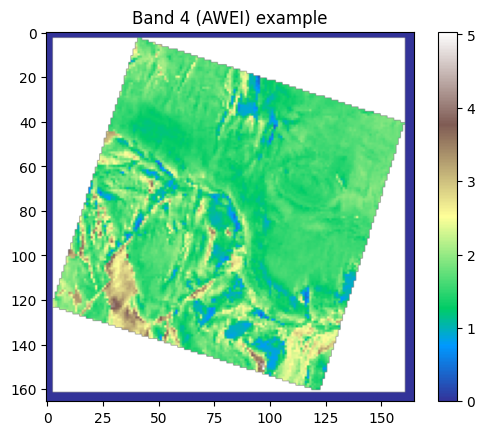

In [ ]:
import rasterio, numpy as np, matplotlib.pyplot as plt

SAVE_DIR = '/content/drive/MyDrive/Lake_Patches_FFFFinal/lake_1350_2022_7.tif'

with rasterio.open(SAVE_DIR) as src:
    arr = src.read().astype(float)    # (bands, H, W)
    print("Bands:", src.count)
    print("Shape:", arr.shape)

    for i in range(src.count):
        band = arr[i]
        print(
            f"Band {i+1}: NaNs={np.isnan(band).sum():,}, "
            f"min={np.nanmin(band):.3f}, max={np.nanmax(band):.3f}, "
            f"mean={np.nanmean(band):.3f}"
        )

plt.imshow(arr[3], cmap='terrain')
plt.title('Band 4 (AWEI) example')
plt.colorbar()
plt.show()


In [ ]:
import glob
files = sorted(glob.glob('/content/drive/MyDrive/Lake_Patches_FFinal/*.tif'))

for f in files:
    with rasterio.open(f) as src:
        arr = src.read().astype(float)
        nan_ratio = np.isnan(arr).sum() / arr.size
        print(f"{os.path.basename(f)} — NaN%: {100*nan_ratio:.2f}, mean={np.nanmean(arr):.2f}")


lake_1186_2017_7.tif — NaN%: 15.76, mean=96.19
lake_1186_2019_6.tif — NaN%: 15.76, mean=96.23
lake_1186_2019_7.tif — NaN%: 15.76, mean=96.45
lake_1186_2019_8.tif — NaN%: 15.76, mean=96.18
lake_1186_2019_9.tif — NaN%: 15.76, mean=95.42
lake_1186_2020_6.tif — NaN%: 15.76, mean=95.98
lake_1186_2020_7.tif — NaN%: 15.76, mean=96.30
lake_1186_2020_8.tif — NaN%: 15.76, mean=96.13
lake_1186_2020_9.tif — NaN%: 15.76, mean=95.45
lake_1186_2021_6.tif — NaN%: 15.76, mean=96.01


KeyboardInterrupt: 

In [ ]:
## REplacing )s

#OTher stuff


In [ ]:
import os, glob
import numpy as np
import rasterio

# --------------------------------------------
# 1️⃣ Locate all TIFFs
# --------------------------------------------
files = sorted(glob.glob('/content/drive/MyDrive/Lake_Patches_FFinal/*.tif'))
print(f"Found {len(files)} .tif files")

# --------------------------------------------
# 2️⃣ Convert each .tif → .npy (replace NaNs with 0)
# --------------------------------------------
for f in files:
    with rasterio.open(f) as src:
        arr = src.read().astype(np.float32)   # (bands, H, W)
        arr = np.nan_to_num(arr, nan=0.0)     # replace NaNs with 0

    npy_path = f.replace('.tif', '.npy')
    np.save(npy_path, arr)
    print(f"✅ Saved: {os.path.basename(npy_path)}  shape={arr.shape}, min={arr.min():.2f}, max={arr.max():.2f}")

print("\n🎉 All files converted to .npy and NaNs replaced with 0.0")


Found 478 .tif files
✅ Saved: lake_1186_2017_7.npy  shape=(5, 166, 165), min=0.00, max=684.77
✅ Saved: lake_1186_2019_6.npy  shape=(5, 166, 165), min=0.00, max=684.77
✅ Saved: lake_1186_2019_7.npy  shape=(5, 166, 165), min=0.00, max=684.77
✅ Saved: lake_1186_2019_8.npy  shape=(5, 166, 165), min=0.00, max=684.77
✅ Saved: lake_1186_2019_9.npy  shape=(5, 166, 165), min=0.00, max=684.77
✅ Saved: lake_1186_2020_6.npy  shape=(5, 166, 165), min=0.00, max=684.77
✅ Saved: lake_1186_2020_7.npy  shape=(5, 166, 165), min=0.00, max=684.77
✅ Saved: lake_1186_2020_8.npy  shape=(5, 166, 165), min=0.00, max=684.77
✅ Saved: lake_1186_2020_9.npy  shape=(5, 166, 165), min=0.00, max=684.77
✅ Saved: lake_1186_2021_6.npy  shape=(5, 166, 165), min=0.00, max=684.77
✅ Saved: lake_1186_2021_7.npy  shape=(5, 166, 165), min=0.00, max=684.77
✅ Saved: lake_1186_2021_8.npy  shape=(5, 166, 165), min=0.00, max=684.77
✅ Saved: lake_1186_2021_9.npy  shape=(5, 166, 165), min=0.00, max=684.77
✅ Saved: lake_1186_2022_6.npy 

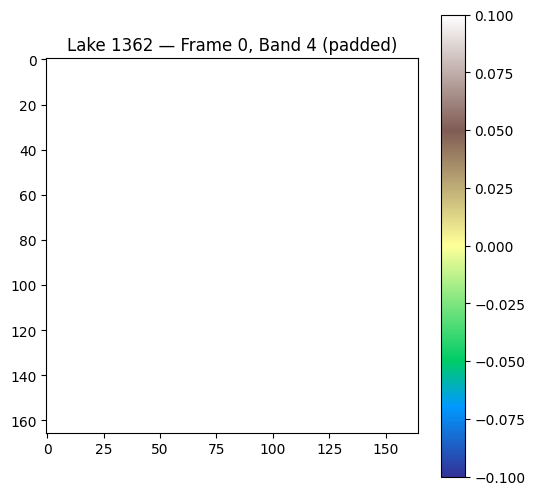

In [ ]:
import matplotlib.pyplot as plt

lake_id = list(padded_lakes.keys())[2]
arr = padded_lakes[lake_id]

# pick one month (frame) and one band (e.g., DEM)
t = 0
band = 4

plt.figure(figsize=(6,6))
plt.imshow(arr[t, :, :, band], cmap='terrain')
plt.title(f"Lake {lake_id} — Frame {t}, Band {band} (padded)")
plt.colorbar()
plt.show()


In [ ]:
arr

array([[[[nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         ...,
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan]],

        [[nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         ...,
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan]],

        [[nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         ...,
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan]],

        ...,

        [[nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         ...,
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan],
         [nan, nan, nan, nan, nan]],

        [[nan, nan, nan, nan, nan],
         [nan, nan, na

In [ ]:
for lake_id, arr in lake_arrays.items():
    print(
        f"Lake {lake_id}: shape={arr.shape}, "
        f"min={arr.min():.4f}, max={arr.max():.4f}, mean={arr.mean():.4f}"
    )


Lake 1186: shape=(25, 147, 146, 5), min=nan, max=nan, mean=nan
Lake 1350: shape=(24, 159, 158, 5), min=nan, max=nan, mean=nan
Lake 1362: shape=(24, 148, 147, 5), min=nan, max=nan, mean=nan
Lake 1403: shape=(24, 156, 156, 5), min=nan, max=nan, mean=nan
Lake 2568: shape=(24, 164, 163, 5), min=nan, max=nan, mean=nan
Lake 2684: shape=(24, 166, 165, 5), min=nan, max=nan, mean=nan
Lake 2727: shape=(24, 164, 164, 5), min=nan, max=nan, mean=nan
Lake 2825: shape=(24, 150, 149, 5), min=nan, max=nan, mean=nan
Lake 2889: shape=(27, 147, 146, 5), min=nan, max=nan, mean=nan
Lake 2902: shape=(23, 159, 159, 5), min=nan, max=nan, mean=nan
Lake 3087: shape=(25, 163, 162, 5), min=nan, max=nan, mean=nan
Lake 3436: shape=(24, 143, 142, 5), min=nan, max=nan, mean=nan
Lake 357: shape=(22, 143, 142, 5), min=nan, max=nan, mean=nan
Lake 376: shape=(23, 143, 142, 5), min=nan, max=nan, mean=nan
Lake 401: shape=(23, 143, 143, 5), min=nan, max=nan, mean=nan
Lake 4229: shape=(24, 162, 161, 5), min=nan, max=nan, mean

In [ ]:

SAVE_DIR = '/content/drive/MyDrive/Greenland_Padded_Lakes_Final_Final_Final/'
with rasterio.open(SAVE_DIR) as src:
    arr = src.read()  # shape (5, 128, 128)
    print("Shape:", arr.shape)
    for i in range(src.count):
        b = arr[i]
        print(f"Band {i+1}: min={np.nanmin(b)}, max={np.nanmax(b)}, mean={np.nanmean(b)}, NaNs={np.isnan(b).sum()}")


RasterioIOError: '/content/drive/MyDrive/Greenland_Padded_Lakes_Final_Final_Final' not recognized as being in a supported file format.

In [ ]:
import os

SAVE_DIR = '/content/drive/MyDrive/Greenland_Padded_Lakes_Final_Final_Final'
os.makedirs(SAVE_DIR, exist_ok=True)

for lake_id, arr in padded_lakes.items():
    path = os.path.join(SAVE_DIR, f'lake_{lake_id}_padded.npy')
    np.save(path, arr)
    print(f"💾 Saved {path}, shape={arr.shape}")

print("✅ All padded arrays saved to Drive.")


💾 Saved /content/drive/MyDrive/Greenland_Padded_Lakes_Final_Final_Final/lake_1186_padded.npy, shape=(25, 166, 165, 5)
💾 Saved /content/drive/MyDrive/Greenland_Padded_Lakes_Final_Final_Final/lake_1350_padded.npy, shape=(24, 166, 165, 5)
💾 Saved /content/drive/MyDrive/Greenland_Padded_Lakes_Final_Final_Final/lake_1362_padded.npy, shape=(24, 166, 165, 5)
💾 Saved /content/drive/MyDrive/Greenland_Padded_Lakes_Final_Final_Final/lake_1403_padded.npy, shape=(24, 166, 165, 5)
💾 Saved /content/drive/MyDrive/Greenland_Padded_Lakes_Final_Final_Final/lake_2568_padded.npy, shape=(24, 166, 165, 5)
💾 Saved /content/drive/MyDrive/Greenland_Padded_Lakes_Final_Final_Final/lake_2684_padded.npy, shape=(24, 166, 165, 5)
💾 Saved /content/drive/MyDrive/Greenland_Padded_Lakes_Final_Final_Final/lake_2727_padded.npy, shape=(24, 166, 165, 5)
💾 Saved /content/drive/MyDrive/Greenland_Padded_Lakes_Final_Final_Final/lake_2825_padded.npy, shape=(24, 166, 165, 5)
💾 Saved /content/drive/MyDrive/Greenland_Padded_Lakes_Fi

In [ ]:
import os

path_to_check = '/content/drive/MyDrive/Greenland_Padded_Lakes'

if os.path.exists(path_to_check):
    print(f"The path '{path_to_check}' exists.")
else:
    print(f"The path '{path_to_check}' does not exist.")

# To check specifically for a file:
if os.path.isfile(path_to_check):
    print(f"'{path_to_check}' is a file.")

# To check specifically for a directory:
if os.path.isdir(path_to_check):
    print(f"'{path_to_check}' is a directory.")

The path '/content/drive/MyDrive/Greenland_Padded_Lakes' exists.
'/content/drive/MyDrive/Greenland_Padded_Lakes' is a directory.


##Using PAdded Lakes

##FIxing NaNs

In [ ]:
import os
import re
import numpy as np

# --------------------------------------------
# 1️⃣ Define the path to your saved data
# --------------------------------------------
# This must be the *exact* same directory you saved the files to.
SAVE_DIR = '/content/drive/MyDrive/Lake_Patches_All'


# --------------------------------------------
# 2️⃣ Reload the lakes into a dictionary
# --------------------------------------------
padded_lakes = {}
pattern = re.compile(r"lake_(\d+)_padded\.npy")

print(f"🔎 Scanning for .npy files in {SAVE_DIR}...")

# Loop through all files in the directory
for file in sorted(os.listdir(SAVE_DIR)):
    # Check if the file matches our pattern
    match = pattern.match(file)
    if match:
        # Extract the lake_id (the digits) from the filename
        lake_id = int(match.group(1))

        # Construct the full path to the file
        path = os.path.join(SAVE_DIR, file)

        # Load the numpy array
        arr = np.load(path)

        # Add it to our dictionary
        padded_lakes[lake_id] = arr
        # print(f"  -> Loaded lake {lake_id}, shape={arr.shape}") # Optional: uncomment for verbose output

print(f"\n✅ Successfully reloaded {len(padded_lakes)} lakes into the 'padded_lakes' dictionary.")

# --------------------------------------------
# 3️⃣ Verify the data is loaded correctly
# --------------------------------------------
if padded_lakes:
    # Get the ID of the first lake in the dictionary
    example_id = list(padded_lakes.keys())[0]
    example_arr = padded_lakes[example_id]
    print(f"🔍 Verification successful for lake {example_id}:")
    print(f"   Shape: {example_arr.shape}")
    print(f"   Data type: {example_arr.dtype}")
    print(f"   Value range: {(example_arr)} to {example_arr.max():.2f}")
else:
    print("⚠️ Warning: No lakes were loaded. Check if the SAVE_DIR is correct and contains .npy files.")

🔎 Scanning for .npy files in /content/drive/MyDrive/Lake_Patches_All...

✅ Successfully reloaded 0 lakes into the 'padded_lakes' dictionary.
⚠️ Warning: No lakes were loaded. Check if the SAVE_DIR is correct and contains .npy files.


In [ ]:
import rasterio, glob, numpy as np, os

RAW_DIR = '/content/drive/MyDrive/Lake_Patches_All'
files = sorted(glob.glob(f'{RAW_DIR}/*.tif'))

print(f"Found {len(files)} TIFFs")

# Check 5 random ones
for f in files[:5]:
    with rasterio.open(f) as src:
        arr = src.read().astype(np.float32)
    print(f"\n{os.path.basename(f)} → shape {arr.shape}")
    print(f"   NaNs: {np.isnan(arr).sum()} | min: {np.nanmin(arr)} | max: {np.nanmax(arr)}")


Found 478 TIFFs

lake_1186_2017_7.tif → shape (5, 147, 146)
   NaNs: 21585 | min: 0.0 | max: 684.7671508789062

lake_1186_2019_6.tif → shape (5, 147, 146)
   NaNs: 21585 | min: 0.0 | max: 684.7671508789062

lake_1186_2019_7.tif → shape (5, 147, 146)
   NaNs: 21585 | min: 0.0 | max: 684.7671508789062

lake_1186_2019_8.tif → shape (5, 147, 146)
   NaNs: 21585 | min: 0.0 | max: 684.7671508789062

lake_1186_2019_9.tif → shape (5, 147, 146)
   NaNs: 21585 | min: 0.0 | max: 684.7671508789062


In [ ]:
# ==========================================================
# Greenland Lake Patches — Padding + Normalization
# ==========================================================

import os, re, numpy as np, rasterio
from skimage.transform import resize

# --------------------------------------------
# 1️⃣ Paths & regex
# --------------------------------------------
DATA_DIR = '/content/drive/MyDrive/Lake_Patches_All'
pattern = re.compile(r"lake_(\d+)_(\d{4})_(\d{1,2})\.tif")

# { lake_id: {(year, month): np.array} }
lakes = {}

# --------------------------------------------
# 2️⃣ Load & group by lake_id
# --------------------------------------------
for file in sorted(os.listdir(DATA_DIR)):
    if not file.lower().endswith('.tif'):
        continue
    match = pattern.match(file)
    if not match:
        continue
    lake_id, year, month = map(int, match.groups())
    path = os.path.join(DATA_DIR, file)
    with rasterio.open(path) as src:
        arr = src.read().astype(np.float32)  # (bands, H, W)
        arr = np.transpose(arr, (1, 2, 0))   # → (H, W, bands)
    lakes.setdefault(lake_id, {})[(year, month)] = arr

print(f"✅ Loaded {len(lakes)} lakes")

# --------------------------------------------
# 3️⃣ Sort by time & stack into time series
# --------------------------------------------
lake_arrays = {}
for lake_id, time_dict in lakes.items():
    sorted_keys = sorted(time_dict.keys())
    stack = np.stack([time_dict[k] for k in sorted_keys], axis=0)  # (T, H, W, C)
    lake_arrays[lake_id] = stack
    print(f"Lake {lake_id}: {stack.shape}")

# --------------------------------------------
# 4️⃣ Compute largest patch size
# --------------------------------------------
max_h = max(arr.shape[1] for arr in lake_arrays.values())
max_w = max(arr.shape[2] for arr in lake_arrays.values())
print(f"📏 Largest patch = {max_h} × {max_w}")

# --------------------------------------------
# 5️⃣ Pad smaller patches to match largest
# --------------------------------------------
padded_lakes = {}
for lake_id, arr in lake_arrays.items():
    T, H, W, C = arr.shape
    pad_h = (max_h - H) // 2
    pad_w = (max_w - W) // 2
    padded = np.pad(
        arr,
        ((0, 0),
         (pad_h, max_h - H - pad_h),
         (pad_w, max_w - W - pad_w),
         (0, 0)),
        mode='constant', constant_values=0
    )
    padded_lakes[lake_id] = padded
    print(f"Lake {lake_id} padded: {H}×{W} → {max_h}×{max_w}")

# --------------------------------------------
# 6️⃣ Global min–max normalization per band
# --------------------------------------------
mins_list, maxs_list = [], []
for arr in padded_lakes.values():
    mins_list.append(arr.min(axis=(0, 1, 2)))
    maxs_list.append(arr.max(axis=(0, 1, 2)))

mins = np.min(np.stack(mins_list), axis=0)
maxs = np.max(np.stack(maxs_list), axis=0)

for lake_id, arr in padded_lakes.items():
    padded_lakes[lake_id] = (arr - mins) / (maxs - mins + 1e-8)

print("✅ Normalized all bands to [0, 1]")

# --------------------------------------------
# 7️⃣ Verify one example
# --------------------------------------------
lake_id = list(padded_lakes.keys())[0]
example = padded_lakes[lake_id]
print(f"\n🔍 Example lake {lake_id}: shape={example.shape}, "
      f"range=({example.min():.3f}, {example.max():.3f})")


✅ Loaded 20 lakes
Lake 1186: (25, 147, 146, 5)
Lake 1350: (24, 159, 158, 5)
Lake 1362: (24, 148, 147, 5)
Lake 1403: (24, 156, 156, 5)
Lake 2568: (24, 164, 163, 5)
Lake 2684: (24, 166, 165, 5)
Lake 2727: (24, 164, 164, 5)
Lake 2825: (24, 150, 149, 5)
Lake 2889: (27, 147, 146, 5)
Lake 2902: (23, 159, 159, 5)
Lake 3087: (25, 163, 162, 5)
Lake 3436: (24, 143, 142, 5)
Lake 357: (22, 143, 142, 5)
Lake 376: (23, 143, 142, 5)
Lake 401: (23, 143, 143, 5)
Lake 4229: (24, 162, 161, 5)
Lake 433: (24, 144, 143, 5)
Lake 464: (24, 144, 144, 5)
Lake 495: (22, 144, 143, 5)
Lake 690: (24, 143, 143, 5)
📏 Largest patch = 166 × 165
Lake 1186 padded: 147×146 → 166×165
Lake 1350 padded: 159×158 → 166×165
Lake 1362 padded: 148×147 → 166×165
Lake 1403 padded: 156×156 → 166×165
Lake 2568 padded: 164×163 → 166×165
Lake 2684 padded: 166×165 → 166×165
Lake 2727 padded: 164×164 → 166×165
Lake 2825 padded: 150×149 → 166×165
Lake 2889 padded: 147×146 → 166×165
Lake 2902 padded: 159×159 → 166×165
Lake 3087 padded: 163

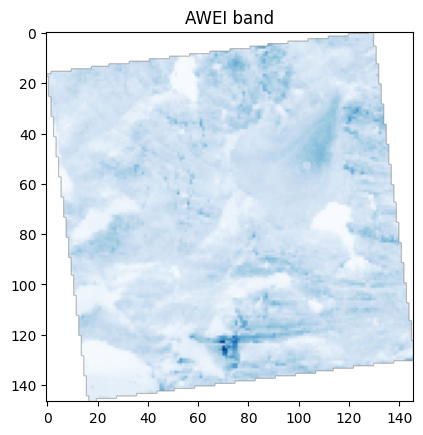

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(arr[3,:,:], cmap='Blues')
plt.title('AWEI band')
plt.show()


In [ ]:
print(arr[0], arr[0])  # DEM




[[[-2.1131802  -1.1565896  -0.22912507         nan         nan]
  [-2.1131802  -1.1565896  -0.22912507         nan         nan]
  [-2.1131802  -1.1565896  -0.22912507         nan         nan]
  ...
  [-2.1131802  -1.1565896  -0.22912507         nan         nan]
  [-2.1131802  -1.1565896  -0.22912507         nan         nan]
  [-2.1131802  -1.1565896  -0.22912507         nan         nan]]

 [[-2.1131802  -1.1565896  -0.22912507         nan         nan]
  [-2.1131802  -1.1565896  -0.22912507         nan         nan]
  [-2.1131802  -1.1565896  -0.22912507         nan         nan]
  ...
  [-2.1131802  -1.1565896  -0.22912507         nan         nan]
  [-2.1131802  -1.1565896  -0.22912507         nan         nan]
  [-2.1131802  -1.1565896  -0.22912507         nan         nan]]

 [[-2.1131802  -1.1565896  -0.22912507         nan         nan]
  [-2.1131802  -1.1565896  -0.22912507         nan         nan]
  [-2.1131802  -1.1565896  -0.22912507         nan         nan]
  ...
  [-2.1131802  -1.

In [ ]:
print(arr[0, 0])

[[-1.0647298  0.5335123 -0.3090402        nan        nan]
 [-1.0647298  0.5335123 -0.3090402        nan        nan]
 [-1.0647298  0.5335123 -0.3090402        nan        nan]
 [-1.0647298  0.5335123 -0.3090402        nan        nan]
 [-1.0647298  0.5335123 -0.3090402        nan        nan]
 [-1.0647298  0.5335123 -0.3090402        nan        nan]
 [-1.0647298  0.5335123 -0.3090402        nan        nan]
 [-1.0647298  0.5335123 -0.3090402        nan        nan]
 [-1.0647298  0.5335123 -0.3090402        nan        nan]
 [-1.0647298  0.5335123 -0.3090402        nan        nan]
 [-1.0647298  0.5335123 -0.3090402        nan        nan]
 [-1.0647298  0.5335123 -0.3090402        nan        nan]
 [-1.0647298  0.5335123 -0.3090402        nan        nan]
 [-1.0647298  0.5335123 -0.3090402        nan        nan]
 [-1.0647298  0.5335123 -0.3090402        nan        nan]
 [-1.0647298  0.5335123 -0.3090402        nan        nan]
 [-1.0647298  0.5335123 -0.3090402        nan        nan]
 [-1.0647298  

In [ ]:
import pandas as pd

static_df = pd.read_csv('/content/LakeArea_With_ModelFeatures.csv')
static_df = static_df.groupby('lake_id')[['elevation','slope','aspect']].mean().reset_index()


In [ ]:
for lake_id, arr in padded_lakes.items():
    # find matching row
    row = static_df.loc[static_df['lake_id'] == lake_id]
    if not row.empty:
        elev = float(row['elevation'])
        slp  = float(row['slope'])
        asp  = float(row['aspect'])
        # fill DEM/slope/aspect bands
        arr[:, :, :, 0] = np.nan_to_num(arr[:, :, :, 0], nan=elev)
        arr[:, :, :, 1] = np.nan_to_num(arr[:, :, :, 1], nan=slp)
        arr[:, :, :, 2] = np.nan_to_num(arr[:, :, :, 2], nan=asp)
        padded_lakes[lake_id] = arr
    else:
        print(f"⚠️ No static info for lake {lake_id}")


/tmp/ipython-input-3441398864.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  elev = float(row['elevation'])
/tmp/ipython-input-3441398864.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  slp  = float(row['slope'])
/tmp/ipython-input-3441398864.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  asp  = float(row['aspect'])


In [ ]:
lid = list(padded_lakes.keys())[0]
arr = padded_lakes[lid]
print(f"Lake {lid}: DEM mean = {arr[:,:,:,0].mean():.3f}, slope mean = {arr[:,:,:,1].mean():.3f}")


Lake 1186: DEM mean = -1.065, slope mean = 0.534


In [ ]:
# --------------------------------------------
# 8️⃣ Save each padded lake as .npy for reuse
# --------------------------------------------
SAVE_DIR = '/content/drive/MyDrive/Lake_Patches_Padded_Final'
os.makedirs(SAVE_DIR, exist_ok=True)

for lake_id, arr in padded_lakes.items():
    out_path = os.path.join(SAVE_DIR, f"lake_{lake_id}_padded.npy")
    np.save(out_path, arr)
    print(f"💾 Saved: {out_path}")

print(f"\n✅ All padded lakes saved to: {SAVE_DIR}")

💾 Saved: /content/drive/MyDrive/Lake_Patches_Padded_Final/lake_1186_padded.npy
💾 Saved: /content/drive/MyDrive/Lake_Patches_Padded_Final/lake_1350_padded.npy
💾 Saved: /content/drive/MyDrive/Lake_Patches_Padded_Final/lake_1362_padded.npy
💾 Saved: /content/drive/MyDrive/Lake_Patches_Padded_Final/lake_1403_padded.npy
💾 Saved: /content/drive/MyDrive/Lake_Patches_Padded_Final/lake_2568_padded.npy
💾 Saved: /content/drive/MyDrive/Lake_Patches_Padded_Final/lake_2684_padded.npy
💾 Saved: /content/drive/MyDrive/Lake_Patches_Padded_Final/lake_2727_padded.npy
💾 Saved: /content/drive/MyDrive/Lake_Patches_Padded_Final/lake_2825_padded.npy
💾 Saved: /content/drive/MyDrive/Lake_Patches_Padded_Final/lake_2889_padded.npy
💾 Saved: /content/drive/MyDrive/Lake_Patches_Padded_Final/lake_2902_padded.npy
💾 Saved: /content/drive/MyDrive/Lake_Patches_Padded_Final/lake_3087_padded.npy
💾 Saved: /content/drive/MyDrive/Lake_Patches_Padded_Final/lake_3436_padded.npy
💾 Saved: /content/drive/MyDrive/Lake_Patches_Padded_

In [ ]:
import os
DATA_DIR = '/content/drive/MyDrive/Lake_Patches_All'
print(len([f for f in os.listdir(DATA_DIR) if f.lower().endswith('.tif')]))


478


In [ ]:
import glob
files = glob.glob('/content/drive/MyDrive/Lake_Patches_All/*.tif')
print("Number of TIFFs:", len(files))
print(files[:5])


Number of TIFFs: 478
['/content/drive/MyDrive/Lake_Patches_All/lake_357_2020_7.tif', '/content/drive/MyDrive/Lake_Patches_All/lake_357_2020_8.tif', '/content/drive/MyDrive/Lake_Patches_All/lake_357_2020_6.tif', '/content/drive/MyDrive/Lake_Patches_All/lake_401_2020_8.tif', '/content/drive/MyDrive/Lake_Patches_All/lake_401_2020_7.tif']


In [ ]:
import rasterio
import os

# --------------------------------------------
# 1️⃣ Paths to your original data
# --------------------------------------------
DATA_DIR = '/content/drive/MyDrive/Lake_Patches_All'
files_to_check = os.listdir(DATA_DIR)

print(f"🔎 Inspecting .tif files in: {DATA_DIR}\n")

# --------------------------------------------
# 2️⃣ Loop and inspect metadata
# --------------------------------------------
nodata_values_found = set() # To store unique NoData values

# We'll just check the first 10 files to avoid a huge printout
for filename in files_to_check[:10]:
    if filename.endswith('.tif'):
        path = os.path.join(DATA_DIR, filename)

        try:
            with rasterio.open(path) as src:
                # This attribute holds the file's designated NoData value
                nodata_value = src.nodata

                if nodata_value is not None:
                    print(f"✅ {filename}: NoData value is {nodata_value}")
                    nodata_values_found.add(nodata_value)
                else:
                    print(f"ℹ️ {filename}: No NoData value is set in metadata.")

        except Exception as e:
            print(f"❌ Error reading {filename}: {e}")

print("\n-------------------------------------------")
if nodata_values_found:
    print(f"🔍 Summary: Found these NoData values in your files: {nodata_values_found}")
    print("When rasterio loads these files into a float array, these values become NaN.")
else:
    print("🔍 Summary: No files with a specified NoData value were found in the sample.")

🔎 Inspecting .tif files in: /content/drive/MyDrive/Lake_Patches_All

ℹ️ lake_357_2020_7.tif: No NoData value is set in metadata.
ℹ️ lake_357_2020_8.tif: No NoData value is set in metadata.
ℹ️ lake_357_2020_6.tif: No NoData value is set in metadata.
ℹ️ lake_401_2020_8.tif: No NoData value is set in metadata.
ℹ️ lake_401_2020_7.tif: No NoData value is set in metadata.
ℹ️ lake_401_2020_6.tif: No NoData value is set in metadata.
ℹ️ lake_464_2020_8.tif: No NoData value is set in metadata.
ℹ️ lake_4229_2020_6.tif: No NoData value is set in metadata.
ℹ️ lake_464_2020_6.tif: No NoData value is set in metadata.
ℹ️ lake_464_2020_7.tif: No NoData value is set in metadata.

-------------------------------------------
🔍 Summary: No files with a specified NoData value were found in the sample.


In [ ]:
import numpy as np
import os

# --------------------------------------------
# 1️⃣ Path to a single, specific file
# --------------------------------------------
DATA_DIR = '/content/drive/MyDrive/Lake_Patches_FFinal/'
filename_to_check = 'lake_357_2023_7.npy'
path = os.path.join(DATA_DIR, filename_to_check)

print(f"🔬 Deep inspecting pixel data for: {filename_to_check}")

# --------------------------------------------
# 2️⃣ Load the array and run diagnostics
# --------------------------------------------
try:
    arr = np.load(path).astype(np.float32)  # Load NumPy array (bands, H, W)

    # --- Diagnostics ---
    nan_count = np.isnan(arr).sum()
    inf_count = np.isinf(arr).sum()

    print(f"\n--- Analysis Results ---")
    print(f"Array shape: {arr.shape}")
    print(f"Data type: {arr.dtype}")

    if nan_count > 0:
        print(f"🔴 Found {nan_count:,} NaN values directly in the file.")
    else:
        print(f"🟢 No NaN values found.")

    if inf_count > 0:
        print(f"🔴 Found {inf_count:,} infinite values directly in the file.")
    else:
        print(f"🟢 No infinite values found.")

    print("\n--- Statistical Summary ---")
    print(f"Min value:  {np.nanmin(arr):.4f}")
    print(f"Max value:  {np.nanmax(arr):.4f}")
    print(f"Mean value: {np.nanmean(arr):.4f}")

except Exception as e:
    print(f"❌ Error during inspection: {e}")


🔬 Deep inspecting pixel data for: lake_357_2023_7.npy

--- Analysis Results ---
Array shape: (5, 166, 165)
Data type: float32
🟢 No NaN values found.
🟢 No infinite values found.

--- Statistical Summary ---
Min value:  0.0000
Max value:  868.9933
Mean value: 115.9073


In [ ]:
import numpy as np, rasterio

path = '/content/drive/MyDrive/Lake_Patches_All/lake_357_2020_7.tif'
with rasterio.open(path) as src:
    arr = src.read().astype(np.float32)  # (bands, H, W)

for i in range(arr.shape[0]):
    nan_count = np.isnan(arr[i]).sum()
    print(f"Band {i}: {nan_count} NaNs")


Band 0: 3125 NaNs
Band 1: 3125 NaNs
Band 2: 3125 NaNs
Band 3: 3125 NaNs
Band 4: 3125 NaNs


In [ ]:
# ==========================================================
# Greenland Lake Patches — Clean NaNs/Inf Across All TIFFs
# ==========================================================

import os, glob, numpy as np, rasterio

# ✅ Folder containing all your TIFFs
FOLDER = '/content/drive/MyDrive/Lake_Patches_All'
CLEAN_FOLDER = '/content/drive/MyDrive/Lake_Patches_All_Cleaned'

os.makedirs(CLEAN_FOLDER, exist_ok=True)

files = sorted(glob.glob(f'{FOLDER}/*.tif'))
print(f"🧾 Found {len(files)} TIFFs to clean.")

# ----------------------------------------------------------
# Loop through and clean each one
# ----------------------------------------------------------
for f in files:
    with rasterio.open(f) as src:
        arr = src.read().astype(np.float32)
        profile = src.profile

    # Replace NaN and Inf with 0
    n_nans = np.isnan(arr).sum()
    n_posinf = np.isposinf(arr).sum()
    n_neginf = np.isneginf(arr).sum()

    arr = np.nan_to_num(arr, nan=0.0, posinf=0.0, neginf=0.0)

    # Save to cleaned folder
    out_path = os.path.join(CLEAN_FOLDER, os.path.basename(f))
    with rasterio.open(out_path, 'w', **profile) as dst:
        dst.write(arr)

    print(f"✅ Cleaned {os.path.basename(f)} | "
          f"NaNs replaced: {n_nans}, +inf: {n_posinf}, -inf: {n_neginf}")

print("\n🎉 All cleaned TIFFs saved to:", CLEAN_FOLDER)


🧾 Found 478 TIFFs to clean.
✅ Cleaned lake_1186_2017_7.tif | NaNs replaced: 21585, +inf: 0, -inf: 0
✅ Cleaned lake_1186_2019_6.tif | NaNs replaced: 21585, +inf: 0, -inf: 0
✅ Cleaned lake_1186_2019_7.tif | NaNs replaced: 21585, +inf: 0, -inf: 0
✅ Cleaned lake_1186_2019_8.tif | NaNs replaced: 21585, +inf: 0, -inf: 0
✅ Cleaned lake_1186_2019_9.tif | NaNs replaced: 21585, +inf: 0, -inf: 0
✅ Cleaned lake_1186_2020_6.tif | NaNs replaced: 21585, +inf: 0, -inf: 0
✅ Cleaned lake_1186_2020_7.tif | NaNs replaced: 21585, +inf: 0, -inf: 0
✅ Cleaned lake_1186_2020_8.tif | NaNs replaced: 21585, +inf: 0, -inf: 0
✅ Cleaned lake_1186_2020_9.tif | NaNs replaced: 21585, +inf: 0, -inf: 0
✅ Cleaned lake_1186_2021_6.tif | NaNs replaced: 21585, +inf: 0, -inf: 0
✅ Cleaned lake_1186_2021_7.tif | NaNs replaced: 21585, +inf: 0, -inf: 0
✅ Cleaned lake_1186_2021_8.tif | NaNs replaced: 21585, +inf: 0, -inf: 0
✅ Cleaned lake_1186_2021_9.tif | NaNs replaced: 21585, +inf: 0, -inf: 0
✅ Cleaned lake_1186_2022_6.tif | NaN

In [ ]:
import rasterio, numpy as np

with rasterio.open("/content/drive/MyDrive/Lake_Patches_All/lake_1403_2024_9.tif") as src:

    melt = src.read(5).astype(float)  # band 5 = melt (1-indexed)
    print("NaNs:", np.isnan(melt).sum())
    print("Min:", np.nanmin(melt), "Max:", np.nanmax(melt))
    print("Mean:", np.nanmean(melt))


NaNs: 8390
Min: 0.0 Max: 0.0
Mean: 0.0


In [ ]:
# ==========================================================
# Greenland Padded Lakes — Clean NaNs/Inf in Padded Arrays
# ==========================================================

import os, re, numpy as np

# --------------------------------------------
# 1️⃣ Load previously padded (NaN-containing) arrays
# --------------------------------------------
OLD_DIR = '/content/drive/MyDrive/Lake_Patches_Padded_Final'       # original folder
NEW_DIR = '/content/drive/MyDrive/Greenland_Padded_Lakes_Cleaned'  # new safe folder
os.makedirs(NEW_DIR, exist_ok=True)

pattern = re.compile(r"lake_(\d+)_padded\.npy")
padded_lakes = {}

print(f"✅ Loading pre-processed data from {OLD_DIR}...")
for file in sorted(os.listdir(OLD_DIR)):
    match = pattern.match(file)
    if match:
        lake_id = int(match.group(1))
        path = os.path.join(OLD_DIR, file)
        arr = np.load(path)
        padded_lakes[lake_id] = arr

print(f"📦 Loaded {len(padded_lakes)} padded lakes.")

# --------------------------------------------
# 2️⃣ Clean: Replace NaN / ±Inf with 0.0
# --------------------------------------------
print("\n🧼 Cleaning data (replacing NaN / ±Inf with 0.0)...")
for lake_id, arr in padded_lakes.items():
    nan_count = np.isnan(arr).sum()
    inf_count = np.isinf(arr).sum()
    arr_clean = np.nan_to_num(arr, nan=0.0, posinf=0.0, neginf=0.0)

    # save cleaned copy to new folder
    out_path = os.path.join(NEW_DIR, f"lake_{lake_id}_padded.npy")
    np.save(out_path, arr_clean)
    print(f"✅ lake_{lake_id}: NaNs={nan_count}, Infs={inf_count} → cleaned & saved")

print(f"\n🎉 All cleaned arrays saved to: {NEW_DIR}")

# --------------------------------------------
# 3️⃣ Verify one example
# --------------------------------------------
example_id = list(padded_lakes.keys())[0]
example_arr = np.load(os.path.join(NEW_DIR, f"lake_{example_id}_padded.npy"))
print(f"\n🔬 Final check on cleaned lake {example_id}:")
print(f"   Value range: {example_arr.min():.2f} → {example_arr.max():.2f}")
print(f"   Contains NaNs?  {np.isnan(example_arr).any()}")
print(f"   Contains ±Inf?  {np.isinf(example_arr).any()}")


✅ Loading pre-processed data from /content/drive/MyDrive/Lake_Patches_Padded_Final...
📦 Loaded 20 padded lakes.

🧼 Cleaning data (replacing NaN / ±Inf with 0.0)...
✅ lake_1186: NaNs=3423750, Infs=0 → cleaned & saved
✅ lake_1350: NaNs=3286800, Infs=0 → cleaned & saved
✅ lake_1362: NaNs=3286800, Infs=0 → cleaned & saved
✅ lake_1403: NaNs=3286800, Infs=0 → cleaned & saved
✅ lake_2568: NaNs=3286800, Infs=0 → cleaned & saved
✅ lake_2684: NaNs=3286800, Infs=0 → cleaned & saved
✅ lake_2727: NaNs=3286800, Infs=0 → cleaned & saved
✅ lake_2825: NaNs=3286800, Infs=0 → cleaned & saved
✅ lake_2889: NaNs=3697650, Infs=0 → cleaned & saved
✅ lake_2902: NaNs=3149850, Infs=0 → cleaned & saved
✅ lake_3087: NaNs=3423750, Infs=0 → cleaned & saved
✅ lake_3436: NaNs=3286800, Infs=0 → cleaned & saved
✅ lake_357: NaNs=3012900, Infs=0 → cleaned & saved
✅ lake_376: NaNs=3149850, Infs=0 → cleaned & saved
✅ lake_401: NaNs=3149850, Infs=0 → cleaned & saved
✅ lake_4229: NaNs=3286800, Infs=0 → cleaned & saved
✅ lake_

In [ ]:
import rasterio
from rasterio.transform import from_origin
import os

# pick one lake ID (change if needed)
lake_id = list(padded_lakes.keys())[0]  # or e.g. 2825
arr = padded_lakes[lake_id]

T, H, W, C = arr.shape
img = arr[-1]  # last timestep (e.g., most recent month)

SAVE_DIR_TIF = '/content/drive/MyDrive/Lake_Patches_All'
os.makedirs(SAVE_DIR_TIF, exist_ok=True)

out_path = os.path.join(SAVE_DIR_TIF, f'lake_{lake_id}_latest_padded.tif')

with rasterio.open(
    out_path,
    'w',
    driver='GTiff',
    height=H,
    width=W,
    count=C,
    dtype='float32',
    crs='EPSG:3413',
    transform=from_origin(0, 0, 1, 1)  # dummy transform (so it opens)
) as dst:
    for i in range(C):
        dst.write(img[:, :, i], i + 1)

print(f"🗺️ Saved single test patch for lake {lake_id}")
print(f"File: {out_path}")


🗺️ Saved single test patch for lake 1186
File: /content/drive/MyDrive/Lake_Patches_All/lake_1186_latest_padded.tif


Lake 1403 → shape: (24, 166, 165, 5)


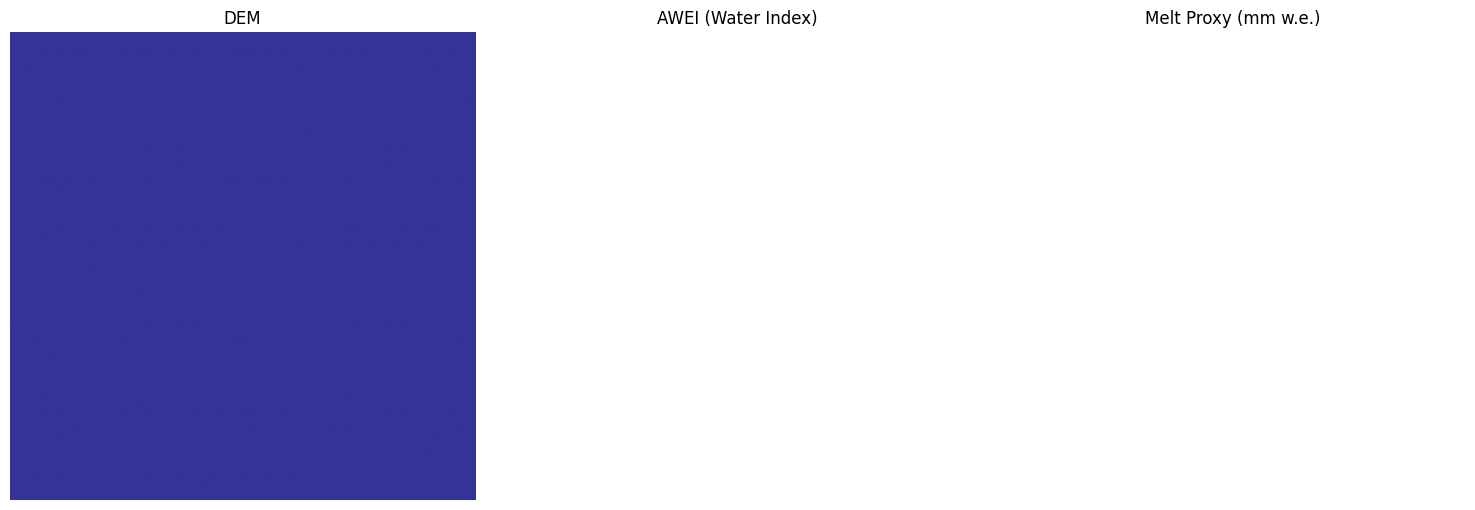

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# pick one lake (change ID if needed)
lake_id = list(padded_lakes.keys())[3]   # or e.g. 2825
arr = padded_lakes[lake_id]              # (T, H, W, C)
T, H, W, C = arr.shape
img = arr[-1]                            # last month

print(f"Lake {lake_id} → shape: {arr.shape}")

# Band order reminder:
# 0: DEM, 1: slope, 2: aspect, 3: AWEI, 4: melt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img[:, :, 0], cmap='terrain')
axs[0].set_title('DEM')

axs[1].imshow(img[:, :, 3], cmap='Blues')
axs[1].set_title('AWEI (Water Index)')

axs[2].imshow(img[:, :, 4], cmap='coolwarm')
axs[2].set_title('Melt Proxy (mm w.e.)')

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
lake_id = list(padded_lakes.keys())[0]  # or specific lake ID
arr = padded_lakes[lake_id]
T, H, W, C = arr.shape
img = arr[-1]  # last timestep

for i, band in enumerate(["DEM", "Slope", "Aspect", "AWEI", "Melt"]):
    print(f"{type(band)}: min={img[:,:,i].min():.4f}, max={img[:,:,i].max():.4f}, mean={img[:,:,i].mean():.4f}")


<class 'str'>: min=-1.0647, max=-1.0647, mean=-1.0647
<class 'str'>: min=0.5335, max=0.5335, mean=0.5335
<class 'str'>: min=-0.3090, max=-0.3090, mean=-0.3090
<class 'str'>: min=nan, max=nan, mean=nan
<class 'str'>: min=nan, max=nan, mean=nan


##Making sure it is numerical

In [ ]:
import os
import re
import numpy as np
import rasterio

DATA_DIR = '/content/drive/MyDrive/Lake_Patches_All_Cleaned'   # folder with your unscaled .tifs
pattern = re.compile(r"lake_(\d+)_(\d{4})_(\d{1,2})\.tif")

lakes = {}

for file in sorted(os.listdir(DATA_DIR)):
    if not file.endswith('.tif'):
        continue
    match = pattern.match(file)
    if not match:
        continue
    lake_id, year, month = map(int, match.groups())
    path = os.path.join(DATA_DIR, file)

    with rasterio.open(path) as src:
        arr = src.read()  # (bands, H, W)
        arr = arr.astype('float32', copy=False)  # ✅ force numeric

        # Replace non-finite values or masked pixels with 0
        arr = np.nan_to_num(arr, nan=0.0, posinf=0.0, neginf=0.0)

        # If bands are unexpectedly categorical or byte, scale to 0–1
        if arr.dtype == np.uint8 or arr.max() > 1e6:
            arr = arr / 255.0

        # Move channels last
        arr = np.transpose(arr, (1, 2, 0))  # → (H, W, bands)

    lakes.setdefault(lake_id, {})[(year, month)] = arr
    print(f"✅ Loaded lake {lake_id} {year}-{month}: shape {arr.shape}, dtype {arr.dtype}")

print(f"Total lakes loaded: {len(lakes)}")


✅ Loaded lake 1186 2017-7: shape (147, 146, 5), dtype float32
✅ Loaded lake 1186 2019-6: shape (147, 146, 5), dtype float32
✅ Loaded lake 1186 2019-7: shape (147, 146, 5), dtype float32
✅ Loaded lake 1186 2019-8: shape (147, 146, 5), dtype float32
✅ Loaded lake 1186 2019-9: shape (147, 146, 5), dtype float32
✅ Loaded lake 1186 2020-6: shape (147, 146, 5), dtype float32
✅ Loaded lake 1186 2020-7: shape (147, 146, 5), dtype float32
✅ Loaded lake 1186 2020-8: shape (147, 146, 5), dtype float32
✅ Loaded lake 1186 2020-9: shape (147, 146, 5), dtype float32
✅ Loaded lake 1186 2021-6: shape (147, 146, 5), dtype float32
✅ Loaded lake 1186 2021-7: shape (147, 146, 5), dtype float32
✅ Loaded lake 1186 2021-8: shape (147, 146, 5), dtype float32
✅ Loaded lake 1186 2021-9: shape (147, 146, 5), dtype float32
✅ Loaded lake 1186 2022-6: shape (147, 146, 5), dtype float32
✅ Loaded lake 1186 2022-7: shape (147, 146, 5), dtype float32
✅ Loaded lake 1186 2022-8: shape (147, 146, 5), dtype float32
✅ Loaded

KeyboardInterrupt: 

In [ ]:
lake_id = list(lakes.keys())[0]
img = list(lakes[lake_id].values())[0]
print(img.shape, img.dtype)
print(np.isnan(img).sum(), "NaNs remain")
print("Value range:", img.min(), "→", img.max())


In [ ]:
list(lakes.keys())[3]

1403

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# pick one lake (change ID if needed)
lake_id = list(lakes.keys())[3]
img = list(lakes[lake_id].values())[3]  # (H, W, 5)

print(f"Lake {lake_id} → shape: {img.shape}, dtype: {img.dtype}")
print(np.isnan(img).sum(), "NaNs remain")
print("Value range:", img.min(), "→", img.max())

# Band order reminder:
# 0: DEM, 1: slope, 2: aspect, 3: AWEI, 4: melt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img[:, :, 0], cmap='terrain')
axs[0].set_title('DEM (Elevation)')

axs[1].imshow(img[:, :, 3], cmap='Blues')
axs[1].set_title('AWEI (Water Index)')

axs[2].imshow(img[:, :,4], cmap='coolwarm')
axs[2].set_title('Melt Proxy (mm w.e.)')

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import os

RAW_DIR = '/content/drive/MyDrive/Lake_Patches_All'             # original exports
CLEAN_DIR = '/content/drive/MyDrive/Lake_Patches_All_CleanedV2' # new frozen version
os.makedirs(CLEAN_DIR, exist_ok=True)


In [ ]:
import numpy as np

SAVE_PATH = '/content/drive/MyDrive/lake_1186_2019_7_cleaned.npy'
np.save(SAVE_PATH, arr)
print("Saved:", SAVE_PATH)


Saved: /content/drive/MyDrive/lake_1186_2019_7_cleaned.npy


In [ ]:
import numpy as np
import rasterio
import glob

tiff_files = sorted(glob.glob(os.path.join(RAW_DIR, '*.tif')))
print(f"Found {len(tiff_files)} TIFFs to clean.")

for path in tiff_files:
    name = os.path.splitext(os.path.basename(path))[0]
    with rasterio.open(path) as src:
        arr = src.read().astype(np.float32)  # (bands, H, W)
        arr = np.transpose(arr, (1, 2, 0))   # → (H, W, 5)

    # Replace NaNs in dynamic layers only
    arr[:, :, 3:] = np.nan_to_num(arr[:, :, 3:], nan=0.0)

    # Optional: rescale melt to ~[0,1] range
    if np.nanmax(arr[:, :, 4]) > 0:
        arr[:, :, 4] = arr[:, :, 4] / np.nanmax(arr[:, :, 4])

    # Save as NumPy binary
    np.save(os.path.join(CLEAN_DIR, f"{name}.npy"), arr)
    print(f"✅ Saved cleaned: {name}.npy")


Found 478 TIFFs to clean.
✅ Saved cleaned: lake_1186_2017_7.npy
✅ Saved cleaned: lake_1186_2019_6.npy
✅ Saved cleaned: lake_1186_2019_7.npy
✅ Saved cleaned: lake_1186_2019_8.npy
✅ Saved cleaned: lake_1186_2019_9.npy
✅ Saved cleaned: lake_1186_2020_6.npy
✅ Saved cleaned: lake_1186_2020_7.npy
✅ Saved cleaned: lake_1186_2020_8.npy
✅ Saved cleaned: lake_1186_2020_9.npy
✅ Saved cleaned: lake_1186_2021_6.npy
✅ Saved cleaned: lake_1186_2021_7.npy
✅ Saved cleaned: lake_1186_2021_8.npy
✅ Saved cleaned: lake_1186_2021_9.npy
✅ Saved cleaned: lake_1186_2022_6.npy
✅ Saved cleaned: lake_1186_2022_7.npy
✅ Saved cleaned: lake_1186_2022_8.npy
✅ Saved cleaned: lake_1186_2022_9.npy
✅ Saved cleaned: lake_1186_2023_6.npy
✅ Saved cleaned: lake_1186_2023_7.npy
✅ Saved cleaned: lake_1186_2023_8.npy
✅ Saved cleaned: lake_1186_2023_9.npy
✅ Saved cleaned: lake_1186_2024_6.npy
✅ Saved cleaned: lake_1186_2024_7.npy
✅ Saved cleaned: lake_1186_2024_8.npy
✅ Saved cleaned: lake_1186_2024_9.npy
✅ Saved cleaned: lake_13

KeyboardInterrupt: 

##Stacking Data

In [ ]:
lake_arrays = {}
for lake_id, months in lakes.items():
    sorted_keys = sorted(months.keys())           # (year, month) ascending
    lake_arrays[lake_id] = np.stack(
        [months[k] for k in sorted_keys], axis=0  # (T, H, W, C)
    )


In [ ]:
max_h = max(a.shape[1] for a in lake_arrays.values())
max_w = max(a.shape[2] for a in lake_arrays.values())

padded_lakes = {}
for lake_id, arr in lake_arrays.items():
    T, H, W, C = arr.shape
    pad_h = (max_h - H) // 2
    pad_w = (max_w - W) // 2
    padded = np.pad(arr, ((0,0), (pad_h, max_h-H-pad_h), (pad_w, max_w-W-pad_w), (0,0)),
                    mode='constant', constant_values=0)
    padded_lakes[lake_id] = padded


In [ ]:
mins_list, maxs_list = [], []
for arr in padded_lakes.values():
    mins_list.append(arr.min(axis=(0,1,2)))
    maxs_list.append(arr.max(axis=(0,1,2)))

mins = np.min(np.stack(mins_list), axis=0)
maxs = np.max(np.stack(maxs_list), axis=0)

for lake_id, arr in padded_lakes.items():
    padded_lakes[lake_id] = (arr - mins) / (maxs - mins + 1e-8)


In [ ]:
def build_sequences(lake_dict, lookback=8, target_band=3):
    X, y = [], []
    for arr in lake_dict.values():
        T, H, W, C = arr.shape
        for t in range(T - lookback):
            X.append(arr[t:t+lookback])         # (8, H, W, 5)
            y.append(arr[t+lookback, :, :, target_band])  # (H, W)
    return np.array(X), np.array(y)

X, y = build_sequences(padded_lakes)
print("X:", X.shape, "y:", y.shape)



In [ ]:
##New training

In [ ]:
import os, re, numpy as np, glob

# --------------------------------------------
# 1️⃣ Load all .npy files and group by lake
# --------------------------------------------
DATA_DIR = '/content/drive/MyDrive/Lake_Patches_FFinal/'
pattern = re.compile(r"lake_(\d+)_(\d{4})_(\d{1,2})\.npy")

lakes = {}

files = sorted(glob.glob(os.path.join(DATA_DIR, "*.npy")))
for f in files:
    match = pattern.search(f)
    if not match:
        continue
    lake_id, year, month = map(int, match.groups())
    arr = np.load(f)                     # (5, H, W)
    arr = np.transpose(arr, (1, 2, 0))   # (H, W, 5)
    lakes.setdefault(lake_id, {})[(year, month)] = arr

print(f"✅ Loaded {len(lakes)} lakes")

# --------------------------------------------
# 2️⃣ Stack time series per lake
# --------------------------------------------
lake_arrays = {}
for lake_id, months in lakes.items():
    sorted_keys = sorted(months.keys())           # (year, month)
    stack = np.stack([months[k] for k in sorted_keys], axis=0)  # (T, H, W, 5)
    lake_arrays[lake_id] = stack
    print(f"Lake {lake_id}: {stack.shape}")

# --------------------------------------------
# 3️⃣ Compute global normalization factors
# --------------------------------------------
mins_list, maxs_list = [], []
for arr in lake_arrays.values():
    mins_list.append(arr.min(axis=(0,1,2)))
    maxs_list.append(arr.max(axis=(0,1,2)))

mins = np.min(np.stack(mins_list), axis=0)
maxs = np.max(np.stack(maxs_list), axis=0)
print("Global band min:", mins)
print("Global band max:", maxs)

# Apply normalization safely
for lake_id, arr in lake_arrays.items():
    diff = maxs - mins
    diff[diff < 1e-8] = 1.0  # avoid divide-by-zero
    lake_arrays[lake_id] = (arr - mins) / diff

print("✅ Normalized all lakes to [0,1]")

# --------------------------------------------
# 4️⃣ Build ConvLSTM sequences
# --------------------------------------------
def build_sequences(lake_dict, lookback=8, target_band=3):
    X, y = [], []
    for arr in lake_dict.values():
        T, H, W, C = arr.shape
        for t in range(T - lookback):
            X.append(arr[t:t+lookback])                   # (lookback, H, W, 5)
            y.append(arr[t+lookback, :, :, target_band])  # (H, W)
    return np.array(X), np.array(y)

X, y = build_sequences(lake_arrays, lookback=8, target_band=3)
print(f"\n✅ Final dataset ready!")
print(f"X: {X.shape}   y: {y.shape}")


✅ Loaded 20 lakes
Lake 1186: (25, 166, 165, 5)
Lake 1350: (24, 166, 165, 5)
Lake 1362: (24, 166, 165, 5)
Lake 1403: (24, 166, 165, 5)
Lake 2568: (24, 166, 165, 5)
Lake 2684: (24, 166, 165, 5)
Lake 2727: (24, 166, 165, 5)
Lake 2825: (24, 166, 165, 5)
Lake 2889: (27, 166, 165, 5)
Lake 2902: (23, 166, 165, 5)
Lake 3087: (25, 166, 165, 5)
Lake 3436: (24, 166, 165, 5)
Lake 357: (22, 166, 165, 5)
Lake 376: (23, 166, 165, 5)
Lake 401: (23, 166, 165, 5)
Lake 4229: (24, 166, 165, 5)
Lake 433: (24, 166, 165, 5)
Lake 464: (24, 166, 165, 5)
Lake 495: (22, 166, 165, 5)
Lake 690: (24, 166, 165, 5)
Global band min: [0. 0. 0. 0. 0.]
Global band max: [2081.864      78.        359.          8.306738   11.261972]
✅ Normalized all lakes to [0,1]

✅ Final dataset ready!
X: (318, 8, 166, 165, 5)   y: (318, 166, 165)


In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: split into train+temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: split temp into validation and test (half-half of the 30%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Train: (222, 8, 166, 165, 5), Val: (48, 8, 166, 165, 5), Test: (48, 8, 166, 165, 5)


In [ ]:
import tensorflow as tf
print("GPU available:", tf.config.list_physical_devices('GPU'))


GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
print(X.dtype)

float32


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Conv2D

model = Sequential([
    ConvLSTM2D(
        filters=32, kernel_size=(3,3), padding='same',
        activation='relu', return_sequences=False,
        input_shape=(X.shape[1], X.shape[2], X.shape[3], X.shape[4])
    ),
    BatchNormalization(),
    Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_lstm2d (ConvLSTM2D)        │ (None, 166, 165, 32)   │        42,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 166, 165, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 166, 165, 1)    │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,169 (168.63 KB)

 Trainable params: 43,105 (168.38 KB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=25, batch_size=4)


Epoch 1/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 222ms/step - loss: 0.1226 - val_loss: 0.0611
Epoch 2/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - loss: 0.0233 - val_loss: 0.0134
Epoch 3/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - loss: 0.0060 - val_loss: 0.0120
Epoch 4/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - loss: 0.0062 - val_loss: 0.0137
Epoch 5/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - loss: 0.0052 - val_loss: 0.0156
Epoch 6/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - loss: 0.0056 - val_loss: 0.0118
Epoch 7/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - loss: 0.0050 - val_loss: 0.0100
Epoch 8/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - loss: 0.0047 - val_loss: 0.0081
Epoch 9/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - loss: 0.0051 - val_loss: 0.0090
Epoch 10/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - loss: 0.0041 - val_loss: 0.0065
Epoch 11/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 12/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/ste

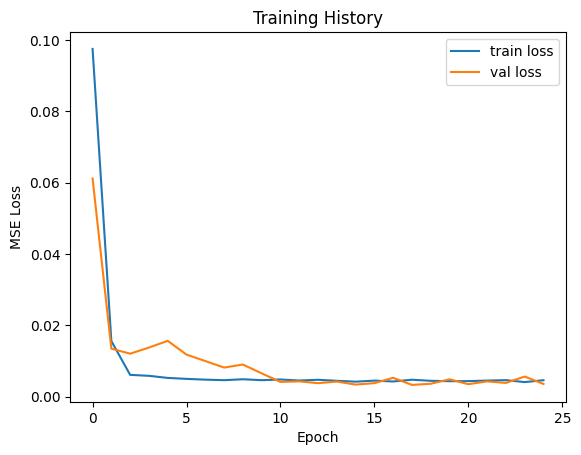

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training History')
plt.show()


In [ ]:
y_pred = model.predict(X_val)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 803ms/step


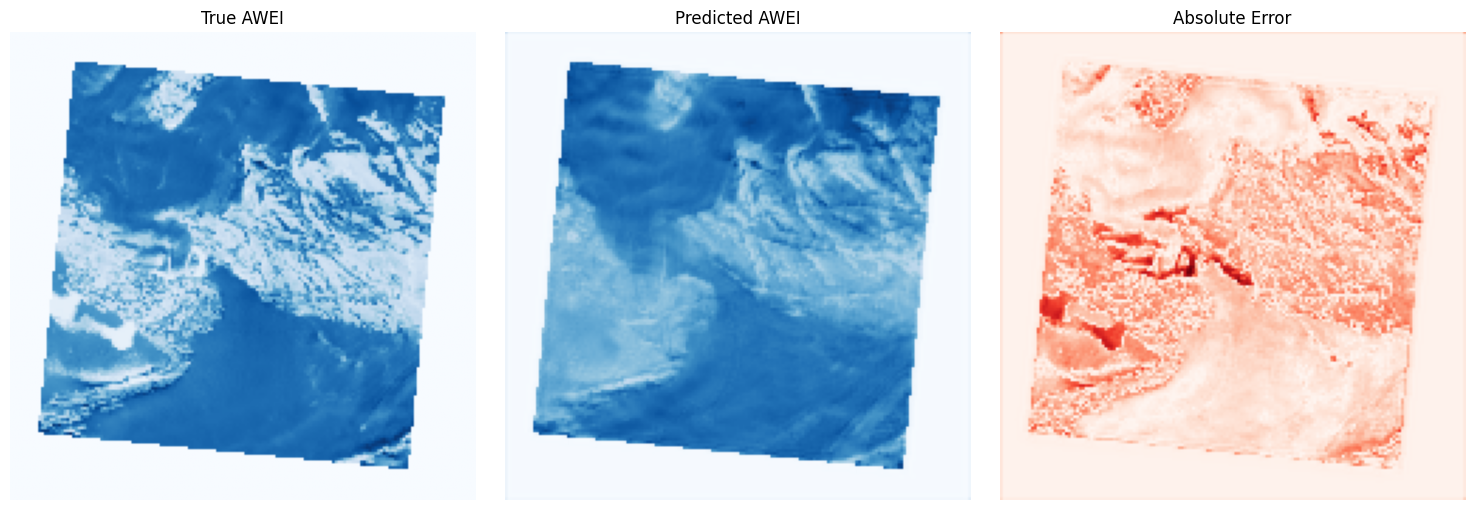

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# pick one test example
i = np.random.randint(0, len(y_val))
pred = y_pred[i, :, :, 0]  # (H, W)
true = y_val[i, :, :]      # (H, W)

fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].imshow(true, cmap='Blues')
axs[0].set_title('True AWEI')

axs[1].imshow(pred, cmap='Blues')
axs[1].set_title('Predicted AWEI')

axs[2].imshow(np.abs(pred - true), cmap='Reds')
axs[2].set_title('Absolute Error')

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_val.flatten(), y_pred.flatten())
r2 = r2_score(y_val.flatten(), y_pred.flatten())

print("MSE:", mse)
print("R² score:", r2)


MSE: 0.0035262610763311386
R² score: 0.8381744623184204


In [ ]:
import numpy as np, tensorflow as tf

def r2(y, yhat):
    y = y.reshape(-1); yhat = yhat.reshape(-1)
    ss_res = np.sum((y - yhat)**2)
    ss_tot = np.sum((y - np.mean(y))**2) + 1e-9
    return 1 - ss_res/ss_tot

def predict(model, X, batch_size=8):
    return model.predict(X, batch_size=batch_size, verbose=0)


In [ ]:
def channel_permutation_importance(model, X, y_true, channel_names):
    base_pred = predict(model, X)
    base_r2 = r2(y_true, base_pred)
    imps = []
    for c, name in enumerate(channel_names):
        X_perm = X.copy()
        # permute within batch for each (t,h,w)
        for t in range(X.shape[1]):
            for h in range(X.shape[2]):
                for w in range(X.shape[3]):
                    np.random.shuffle(X_perm[:, t, h, w, c])
        y_hat = predict(model, X_perm)
        imps.append({'channel': name, 'ΔR2': base_r2 - r2(y_true, y_hat)})
    return sorted(imps, key=lambda d: d['ΔR2'], reverse=True)


In [ ]:
def channel_ablation(model, X, y_true, channel_names, fill='mean'):
    base_pred = predict(model, X)
    base_r2 = r2(y_true, base_pred)
    imps = []
    ch_means = np.mean(X, axis=(0,1,2,3), keepdims=True)  # (1,1,1,1,C)
    for c, name in enumerate(channel_names):
        X_ab = X.copy()
        X_ab[..., c] = ch_means[..., c] if fill=='mean' else 0.0
        y_hat = predict(model, X_ab)
        imps.append({'channel': name, 'ΔR2': base_r2 - r2(y_true, y_hat)})
    return sorted(imps, key=lambda d: d['ΔR2'], reverse=True)


In [ ]:
@tf.function
def _interp_pred_and_grad(model, x0, x1, alphas):
    x0 = tf.cast(x0, tf.float32); x1 = tf.cast(x1, tf.float32)
    grads = []
    preds = []
    for a in alphas:
        x = x0 + a*(x1 - x0)
        with tf.GradientTape() as tape:
            tape.watch(x)
            y = model(x, training=False)
            # if sequence output, you can pick last step: y = y[:,-1]
            y_scalar = tf.reduce_mean(y)  # aggregate to scalar for IG
        g = tape.gradient(y_scalar, x)
        grads.append(g); preds.append(y)
    return tf.stack(grads), tf.stack(preds)

def integrated_gradients_channel_importance(model, X_batch, channel_names, m_steps=32):
    # Use a small random batch for speed
    x1 = tf.convert_to_tensor(X_batch[:8])
    x0 = tf.zeros_like(x1)  # baseline: all-zero (or mean tensor)
    alphas = tf.linspace(0.0, 1.0, m_steps)
    grads, _ = _interp_pred_and_grad(model, x0, x1, alphas)  # (m, B, T,H,W,C)
    avg_grads = tf.reduce_mean(grads, axis=0)  # average over alphas
    ig = (x1 - x0) * avg_grads  # (B,T,H,W,C)
    # Aggregate IG to per-channel scores
    ch_scores = tf.reduce_mean(tf.abs(ig), axis=(0,1,2,3)).numpy()  # (C,)
    return [{'channel': name, 'IG': float(ch_scores[i])} for i, name in enumerate(channel_names)]


In [ ]:
def temporal_permutation_importance(model, X, y_true, channel_idx):
    base_pred = predict(model, X)
    base_r2 = r2(y_true, base_pred)
    T = X.shape[1]
    out = []
    for t in range(T):
        Xp = X.copy()
        np.random.shuffle(Xp[:, t, :, :, channel_idx])  # permute only this timestep
        y_hat = predict(model, Xp)
        out.append({'t': t, 'ΔR2': base_r2 - r2(y_true, y_hat)})
    return out  # plot ΔR2 vs t


In [ ]:
def patch_occlusion_map(model, X_sample, y_true_sample, channel_idx, t_idx, patch=8):
    # X_sample: (1,T,H,W,C), y_true_sample: matching shape for your head
    base = r2(y_true_sample, predict(model, X_sample))
    H, W = X_sample.shape[2], X_sample.shape[3]
    sal = np.zeros((H, W))
    for i in range(0, H, patch):
        for j in range(0, W, patch):
            Xo = X_sample.copy()
            Xo[:, t_idx, i:i+patch, j:j+patch, channel_idx] = 0.0
            sal[i:i+patch, j:j+patch] = base - r2(y_true_sample, predict(model, Xo))
    return sal  # visualize as heatmap


In [ ]:
# Example paths
from tensorflow import keras
import numpy as np

# Load your trained model
model = keras.models.load_model('/content/drive/MyDrive/Greenland_ConvLSTM_Baseline.keras')

In [ ]:
channel_names = [
    'melt',        # physics input
    'DEM',         # elevation
    'slope',       # slope in degrees
    'aspect',      # optional
    'curvature',   # optional
    # add more if you had them (e.g., NDWI, flow accumulation, etc.)
]


In [ ]:
imp_perm = channel_permutation_importance(model, X_test, y_test, channel_names)
import pandas as pd
pd.DataFrame(imp_perm)


,channel,ΔR2
0,aspect,0.261829
1,curvature,0.044801
2,melt,0.013642
3,slope,0.005142
4,DEM,0.000267


In [ ]:
# 🔧 FIX: remove @tf.function and make sure it runs eagerly
def _interp_pred_and_grad(model, x0, x1, alphas):
    grads = []
    preds = []
    for a in alphas:
        x = x0 + a * (x1 - x0)
        with tf.GradientTape() as tape:
            tape.watch(x)
            y = model(x, training=False)
            y_scalar = tf.reduce_mean(y)  # scalar for gradients
        g = tape.gradient(y_scalar, x)
        grads.append(g)
        preds.append(y)
    return tf.stack(grads), tf.stack(preds)

imp_ablate = channel_ablation(model, X_test, y_test, channel_names)
pd.DataFrame(imp_ablate)


,channel,ΔR2
0,aspect,0.457314
1,curvature,0.041999
2,melt,0.028143
3,slope,0.010729
4,DEM,0.000938


In [ ]:
imp_ig = integrated_gradients_channel_importance(model, X_test[:8], channel_names)
pd.DataFrame(imp_ig)


,channel,IG
0,melt,4.095334e-08
1,DEM,7.074473e-09
2,slope,1.539132e-08
3,aspect,5.989002e-08
4,curvature,7.368952e-09


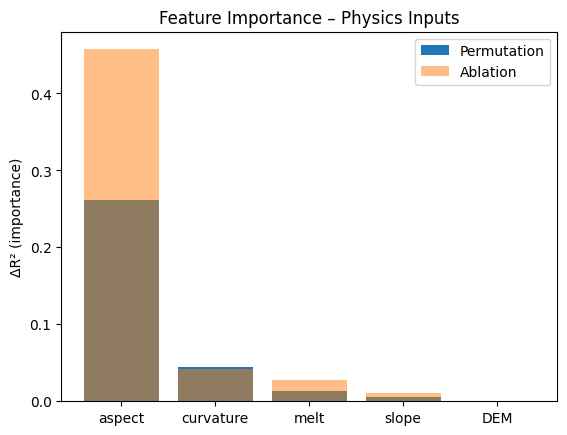

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Combine for easy plotting
df = pd.DataFrame(imp_perm).merge(pd.DataFrame(imp_ablate), on='channel', suffixes=('_perm', '_ablate'))
plt.bar(df['channel'], df['ΔR2_perm'], label='Permutation')
plt.bar(df['channel'], df['ΔR2_ablate'], alpha=0.5, label='Ablation')
plt.ylabel('ΔR² (importance)')
plt.title('Feature Importance – Physics Inputs')
plt.legend()
plt.show()


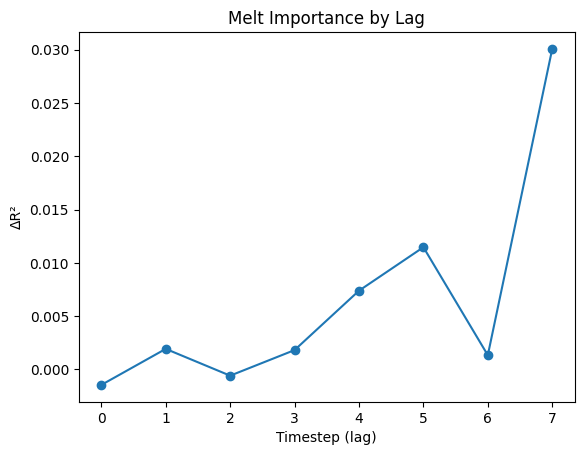

In [ ]:
melt_idx = channel_names.index('melt')
lag_importance = temporal_permutation_importance(model, X_test, y_test, melt_idx)

plt.plot([x['t'] for x in lag_importance],
         [x['ΔR2'] for x in lag_importance],
         marker='o')
plt.xlabel('Timestep (lag)')
plt.ylabel('ΔR²')
plt.title('Melt Importance by Lag')
plt.show()


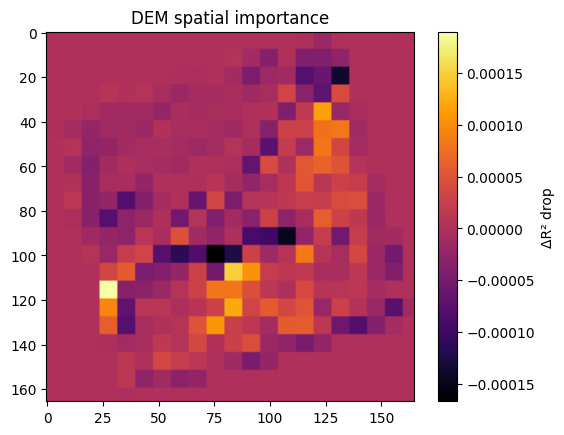

In [ ]:
sample = X_test[0:1]
truth = y_test[0:1]

channel_idx = channel_names.index('DEM')   # pick feature to visualize
t_idx = -1                                 # last timestep

saliency = patch_occlusion_map(model, sample, truth, channel_idx, t_idx, patch=8)

plt.imshow(saliency, cmap='inferno')
plt.colorbar(label='ΔR² drop')
plt.title('DEM spatial importance')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = model.predict(X_test)

mse_test = mean_squared_error(y_test.flatten(), y_test_pred.flatten())
r2_test = r2_score(y_test.flatten(), y_test_pred.flatten())

print("Final Test MSE:", mse_test)
print("Final Test R²:", r2_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step
Final Test MSE: 0.003866631304845214
Final Test R²: 0.8412774801254272


In [ ]:
# Save the trained model
model.save('/content/drive/MyDrive/Greenland_ConvLSTM_Baseline2.keras')


##ConvLSTM Physics

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

class PhysicsLossLayer(layers.Layer):
    def __init__(self, lambda_mass=1e-3, lambda_topo=1e-4, mass_gain_per_melt=1.0, **kwargs):
        """
        lambda_mass: weight for mass-balance penalty
        lambda_topo: weight for slope penalty
        mass_gain_per_melt (k): allowable area change per unit melt (tunable)
        """
        super().__init__(**kwargs)
        self.lambda_mass = lambda_mass
        self.lambda_topo = lambda_topo
        self.k = mass_gain_per_melt

    def call(self, inputs, training=None):
        """
        inputs = [y_pred, seq]
        y_pred: (B, H, W, 1) predicted AWEI at t+1 (0..1)
        seq: (B, T, H, W, C) input window; channels:
             0 DEM, 1 slope (deg), 2 aspect, 3 AWEI (obs), 4 melt
        """
        y_pred, seq = inputs
        B = tf.shape(seq)[0]

        # ----- VALID MASK (exclude padded areas using DEM) -----
        dem_seq = seq[..., 0]  # (B, T, H, W)
        valid_mask = tf.cast(tf.reduce_mean(dem_seq, axis=1) > 0.0, tf.float32)  # (B, H, W)
        valid_mask = valid_mask[..., tf.newaxis]  # (B, H, W, 1)

        # ----- PREVIOUS AWEI (last observed month in input window) -----
        awei_prev = seq[:, -1, :, :, 3:4]  # (B, H, W, 1)

        # ----- MELT CONTEXT -----
        melt_seq = seq[..., 4]  # (B, T, H, W)
        melt_mean = tf.reduce_mean(melt_seq, axis=[1, 2, 3])  # (B,)
        # normalize safely per batch to avoid divide-by-zero
        melt_max = tf.reduce_max(melt_mean)
        melt_mean = tf.where(melt_max > 0, melt_mean / (melt_max + 1e-6), melt_mean)

        # ----- AREA NORMALIZATION -----
        valid_pixels = tf.reduce_sum(valid_mask, axis=[1, 2, 3]) + 1e-6
        area_pred = tf.reduce_sum(y_pred * valid_mask, axis=[1, 2, 3]) / valid_pixels  # (B,)
        area_prev = tf.reduce_sum(awei_prev * valid_mask, axis=[1, 2, 3]) / valid_pixels  # (B,)
        delta_area = tf.abs(area_pred - area_prev)

        # ----- MASS-BALANCE PENALTY -----
        allowance = self.k * melt_mean
        mass_violation = tf.nn.relu(delta_area - allowance)  # (B,)
        mass_loss = tf.reduce_mean(mass_violation)

        # ----- TOPOGRAPHIC PENALTY -----
        slope_seq = seq[..., 1]  # (B, T, H, W)
        slope_map = tf.reduce_mean(slope_seq, axis=1)  # average over time
        slope_map = tf.clip_by_value(slope_map / 90.0, 0.0, 1.0)
        slope_map = slope_map[..., tf.newaxis]  # (B, H, W, 1)

        topo_loss = tf.reduce_mean(slope_map * y_pred * valid_mask)

        # ----- ADD PHYSICS PENALTIES -----
        total_mass_loss = self.lambda_mass * mass_loss
        total_topo_loss = self.lambda_topo * topo_loss
        self.add_loss(total_mass_loss)
        self.add_loss(total_topo_loss)

        # ----- DEBUG PRINTS (only show in eager mode) -----
        if tf.executing_eagerly():
            tf.print(
                "\n[PhysicsLossLayer debug]",
                "\n mean(valid_mask):", tf.reduce_mean(valid_mask),
                "\n mean(melt_mean):", tf.reduce_mean(melt_mean),
                "\n mean(delta_area):", tf.reduce_mean(delta_area),
                "\n mean(allowance):", tf.reduce_mean(allowance),
                "\n mean(slope_map):", tf.reduce_mean(slope_map),
                "\n mass_loss raw:", mass_loss,
                "\n topo_loss raw:", topo_loss,
                summarize=-1
            )

        # Return y_pred unchanged (the model's output)
        return y_pred


In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Conv2D
from tensorflow.keras.optimizers import Adam

# X has shape: (N, T, H, W, C)
T, H, W, C = X_train.shape[1], X_train.shape[2], X_train.shape[3], X_train.shape[4]

seq_in = Input(shape=(T, H, W, C), name='seq_input')

x = ConvLSTM2D(64, (3,3), padding='same', activation='relu', return_sequences=False)(seq_in)
x = BatchNormalization()(x)
y_pred = Conv2D(1, (3,3), padding='same', activation='sigmoid', name='pred')(x)  # (B,H,W,1)

# Add physics penalties; output remains y_pred


phys_layer = PhysicsLossLayer(lambda_mass=1e-4,
                              lambda_topo=1e-5,
                              mass_gain_per_melt=2.0)

phys_model = Model(inputs=seq_in, outputs=phys_layer([y_pred, seq_in]))
phys_model.compile(optimizer=tf.keras.optimizers.Adam(5e-5), loss='mse')

phys_model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='mse') # MSE is data loss; physics added via add_loss
phys_model.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ seq_input           │ (None, 8, 166,    │          0 │ -                 │
│ (InputLayer)        │ 165, 5)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_lstm2d_4       │ (None, 166, 165,  │    159,232 │ seq_input[0][0]   │
│ (ConvLSTM2D)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 166, 165,  │        256 │ conv_lstm2d_4[0]… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pred (Conv2D)       │ (None, 166, 165,  │        577 │ batch_normalizat… │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ physics_loss_layer… │ (None, 166, 165,  │          0 │ pred[0][0],       │
│ (PhysicsLossLayer)  │ 1)                │            │ seq_input[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 160,065 (625.25 KB)

 Trainable params: 159,937 (624.75 KB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.optimizers import Adam

# 1️⃣ Load baseline ConvLSTM model
baseline_path = '/content/drive/MyDrive/Greenland_ConvLSTM_Baseline.keras'
base_model = load_model(baseline_path, compile=False)
print("✅ Baseline model loaded from", baseline_path)

# 2️⃣ Rebuild the physics-informed version
from tensorflow.keras import Input
# you must already have PhysicsLossLayer defined from earlier

# Input shape should match your training data
seq_in = Input(shape=(X.shape[1], X.shape[2], X.shape[3], X.shape[4]), name='seq_input')
y_pred = base_model(seq_in)  # use baseline core to predict next AWEI
y_phys = PhysicsLossLayer(lambda_mass=1e-4, lambda_topo=1e-5, mass_gain_per_melt=2.0)(
    [y_pred, seq_in]
)
phys_model = Model(inputs=seq_in, outputs=y_phys, name='ConvLSTM_Physics')
print("✅ Physics-informed model built")

# 3️⃣ Copy matching weights from baseline
for phys_layer, base_layer in zip(phys_model.layers, base_model.layers):
    if phys_layer.name == base_layer.name:
        try:
            phys_layer.set_weights(base_layer.get_weights())
            print(f"🔁 Copied weights for {phys_layer.name}")
        except Exception as e:
            print(f"⚠️ Skipped {phys_layer.name}: {e}")

# 4️⃣ Compile physics model (smaller LR for fine-tuning)
phys_model.compile(optimizer=Adam(5e-5), loss='mse')
phys_model.summary()

# 5️⃣ Fine-tune on training data
history_phys = phys_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=4,
    verbose=1
)

# 6️⃣ Evaluate on test data
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_test = phys_model.predict(X_test)
mse = mean_squared_error(y_test.flatten(), y_pred_test.flatten())
r2 = r2_score(y_test.flatten(), y_pred_test.flatten())
print(f"\nFinal Physics-Informed Test Results:\nMSE: {mse:.6f}\nR²: {r2:.4f}")

# 7️⃣ Save fine-tuned model
phys_model.save('/content/drive/MyDrive/Greenland_ConvLSTM_Physics_Finetuned.keras')
print("💾 Saved physics-informed model to Drive.")



✅ Baseline model loaded from /content/drive/MyDrive/Greenland_ConvLSTM_Baseline.keras
✅ Physics-informed model built


Model: "ConvLSTM_Physics"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ seq_input           │ (None, 8, 166,    │          0 │ -                 │
│ (InputLayer)        │ 165, 5)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 166, 165,  │     43,169 │ seq_input[0][0]   │
│ (Sequential)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ physics_loss_layer… │ (None, 166, 165,  │          0 │ sequential[0][0], │
│ (PhysicsLossLayer)  │ 1)                │            │ seq_input[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 43,169 (168.63 KB)

 Trainable params: 43,105 (168.38 KB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 246ms/step - loss: 0.0044 - val_loss: 0.0034
Epoch 2/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 3/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 4/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 0.0042 - val_loss: 0.0033
Epoch 5/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 6/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 7/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 8/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - loss: 0.0038 - val_loss: 0.0033
Epoch 9/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - loss: 0.0039 - val_loss: 0.0032
Epoch 10/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - loss: 0.0040 - val_loss: 0.0032
Epoch 11/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step - loss: 0.0039 - val_loss: 0.0032
Epoch 12/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/

In [ ]:
!nvidia-smi

Wed Oct 22 14:51:39 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   73C    P0             28W /   70W |   14068MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.layers import Dropout
# -----------------------------------------------------------
# 1️⃣ Define or import your baseline ConvLSTM core
# -----------------------------------------------------------
# (Assuming you already have a function build_baseline_core() that returns the ConvLSTM stack.)
# If you don't, replace with your actual ConvLSTM model code.

def build_baseline_core(input_shape):
    x_in = Input(shape=input_shape, name='seq_input')
    x = ConvLSTM2D(32, (3,3), padding="same", return_sequences=True)(x_in)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)       # ↑ from 0.2 to 0.3
    x = ConvLSTM2D(32, (3,3), padding="same", return_sequences=False)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = tf.keras.layers.Conv2D(1, (3,3), activation='sigmoid', padding='same', name='pred_AWEI')(x)
    return Model(x_in, x, name='ConvLSTM_Core')

# Build baseline ConvLSTM submodel
core_model = build_baseline_core(
    input_shape=(X.shape[1], X.shape[2], X.shape[3], X.shape[4])
)
print("✅ ConvLSTM core built from scratch")

# -----------------------------------------------------------
# 2️⃣ Attach Physics-Informed loss layer
# -----------------------------------------------------------
# Make sure you already have PhysicsLossLayer implemented
# Example:
# class PhysicsLossLayer(tf.keras.layers.Layer):
#     def __init__(self, lambda_mass, lambda_topo, mass_gain_per_melt, **kwargs): ...

y_pred = core_model.output
y_phys = PhysicsLossLayer(
    lambda_mass=1e-3,
    lambda_topo=1e-3,
    mass_gain_per_melt=2.5
)([y_pred, core_model.input])

phys_model = Model(inputs=core_model.input, outputs=y_phys, name='ConvLSTM_Physics')
print("✅ Physics-informed model initialized (no pretrained weights)")

# -----------------------------------------------------------
# 3️⃣ Compile and train
# -----------------------------------------------------------
phys_model.compile(optimizer=Adam(1e-4), loss='mse')
phys_model.summary()

history_phys = phys_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,             # increase epochs if you want higher accuracy
    batch_size=2,
    verbose=1
)

# -----------------------------------------------------------
# 4️⃣ Evaluate
# -----------------------------------------------------------
y_pred_test = phys_model.predict(X_test)
mse = mean_squared_error(y_test.flatten(), y_pred_test.flatten())
r2 = r2_score(y_test.flatten(), y_pred_test.flatten())

print(f"\nFinal Physics-Informed Test Results:")
print(f"MSE: {mse:.6f}")
print(f"R²:  {r2:.4f}")

# -----------------------------------------------------------
# 5️⃣ Save trained model
# -----------------------------------------------------------
phys_model.save('/content/drive/MyDrive/Greenland_ConvLSTM_Physics_Scratch.keras')
print("💾 Saved new physics-informed model to Drive.")


✅ ConvLSTM core built from scratch
✅ Physics-informed model initialized (no pretrained weights)


Model: "ConvLSTM_Physics"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ seq_input           │ (None, 8, 166,    │          0 │ -                 │
│ (InputLayer)        │ 165, 5)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_lstm2d_19      │ (None, 8, 166,    │     42,752 │ seq_input[0][0]   │
│ (ConvLSTM2D)        │ 165, 32)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 166,    │        128 │ conv_lstm2d_19[0… │
│ (BatchNormalizatio… │ 165, 32)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 8, 166,    │          0 │ batch_normalizat… │
│                     │ 165, 32)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_lstm2d_20      │ (None, 166, 165,  │     73,856 │ dropout_9[0][0]   │
│ (ConvLSTM2D)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 166, 165,  │        128 │ conv_lstm2d_20[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 166, 165,  │          0 │ batch_normalizat… │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pred_AWEI (Conv2D)  │ (None, 166, 165,  │        289 │ dropout_10[0][0]  │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ physics_loss_layer… │ (None, 166, 165,  │          0 │ pred_AWEI[0][0],  │
│ (PhysicsLossLayer)  │ 1)                │            │ seq_input[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 117,153 (457.63 KB)

 Trainable params: 117,025 (457.13 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 31s 200ms/step - loss: 0.1838 - val_loss: 0.1177
Epoch 2/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 21s 186ms/step - loss: 0.1137 - val_loss: 0.0320
Epoch 3/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 21s 187ms/step - loss: 0.0709 - val_loss: 0.0134
Epoch 4/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 20s 184ms/step - loss: 0.0508 - val_loss: 0.0143
Epoch 5/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 21s 185ms/step - loss: 0.0421 - val_loss: 0.0173
Epoch 6/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 21s 185ms/step - loss: 0.0347 - val_loss: 0.0171
Epoch 7/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 21s 186ms/step - loss: 0.0291 - val_loss: 0.0201
Epoch 8/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 21s 185ms/step - loss: 0.0262 - val_loss: 0.0121
Epoch 9/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 21s 186ms/step - loss: 0.0244 - val_loss: 0.0147
Epoch 10/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 20s 184ms/step - loss: 0.0217 - val_loss: 0.0123
Epoch 11/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 41s 185ms/step - loss: 0.0188 - val_loss: 0.0108
Epoch 12/15
111/111

RuntimeError: Physical devices cannot be modified after being initialized

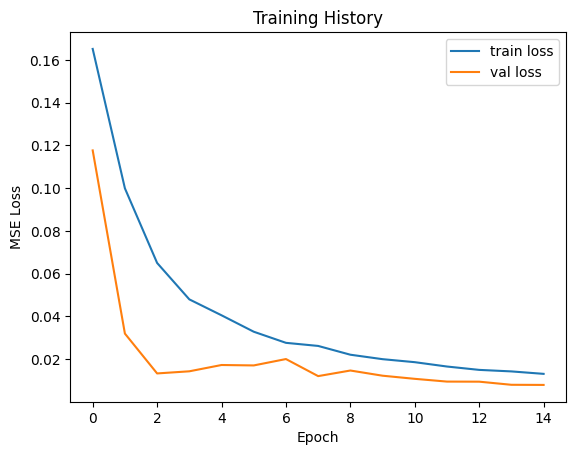

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_phys.history['loss'], label='train loss')
plt.plot(history_phys.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training History')
plt.show()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 12, 64, 64, 6)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_2 (ConvLSTM2D)      │ (None, 12, 64, 64, 32) │        43,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 64, 64, 32) │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_3 (ConvLSTM2D)      │ (None, 64, 64, 32)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,441 (505.63 KB)

 Trainable params: 129,313 (505.13 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/40


ValueError: Input 0 of layer "functional_5" is incompatible with the layer: expected shape=(None, 12, 64, 64, 6), found shape=(None, 8, 166, 165, 5)

In [ ]:
phys_model.save('/content/drive/MyDrive/Greenland_ConvLSTM_Physics.keras')


Physics-Informed Model — TEST METRICS
              MAE_mean: 0.058219
               MAE_std: 0.026500
              MSE_mean: 0.005984
               MSE_std: 0.004855
             RMSE_mean: 0.071854
              RMSE_std: 0.028647
               R2_mean: 0.113331
                R2_std: 0.975769
      Water_on_steep_%: 0.000000
   Mass_violation_mean: 0.013177


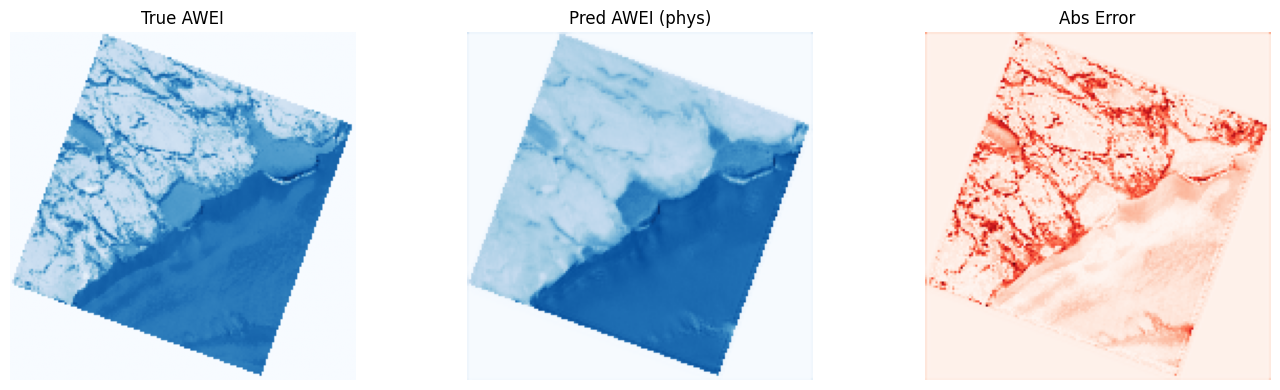

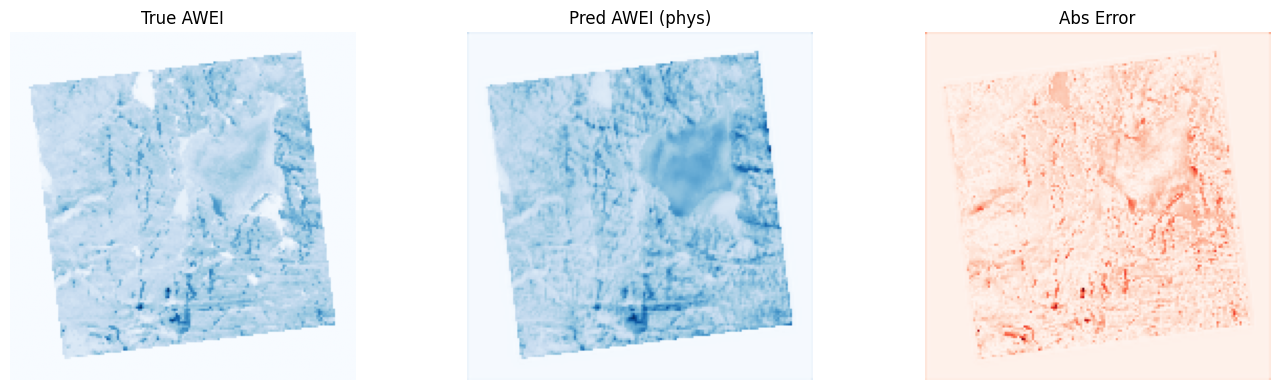

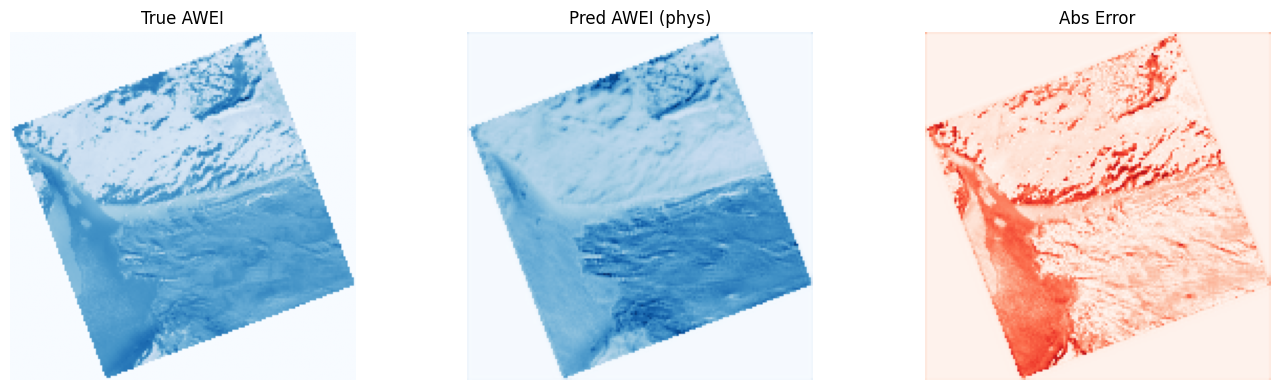

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --------- configurable thresholds (match training choices) ----------
SLOPE_DEG_THRESH = 10.0      # "steep" definition
WATER_THRESH = 0.10          # water probability cutoff for diagnostics
K_MASS = 1.0                 # mass_gain_per_melt used in PhysicsLossLayer

def valid_mask_from_X(X_batch):
    """DEM>0 mask; X: (N,T,H,W,C) with DEM at channel 0."""
    dem_seq = X_batch[..., 0]                         # (N,T,H,W)
    mask = (dem_seq.mean(axis=1) > 0).astype(np.float32)  # (N,H,W)
    return mask

def evaluate_phys(phys_model, X_test, y_test,
                  slope_deg_thresh=SLOPE_DEG_THRESH,
                  water_thresh=WATER_THRESH,
                  k_mass=K_MASS):
    # Predict
    y_pred = phys_model.predict(X_test, verbose=0)
    if y_pred.ndim == 4 and y_pred.shape[-1] == 1:
        y_pred = y_pred[..., 0]   # (N,H,W)

    # Masks & helpers
    mask = valid_mask_from_X(X_test)                  # (N,H,W)
    N, H, W = y_test.shape

    # ----- Standard metrics (masked) -----
    maes, mses, rmses, r2s = [], [], [], []
    for i in range(N):
        m = mask[i] > 0
        yt = y_test[i][m]
        yp = y_pred[i][m]
        if yt.size == 0:
            continue
        maes.append(np.mean(np.abs(yp - yt)))
        mses.append(mean_squared_error(yt, yp))
        rmses.append(np.sqrt(mses[-1]))
        r2s.append(r2_score(yt, yp) if np.std(yt) > 1e-8 else np.nan)

    # ----- Physics diagnostics -----
    # Slope map (avg over time), normalize to [0,1] like training
    slope_seq = X_test[..., 1]                        # (N,T,H,W)
    slope_map = slope_seq.mean(axis=1)                # (N,H,W)
    steep = slope_map > slope_deg_thresh              # boolean mask

    # Pred water mask
    water_pred = (y_pred > water_thresh)

    # % water on steep slopes (masked)
    steep_viol = []
    for i in range(N):
        m = mask[i] > 0
        denom = m.sum()
        if denom == 0:
            continue
        viol = np.logical_and.reduce([m, steep[i], water_pred[i]]).sum() / denom
        steep_viol.append(viol)
    steep_viol_pct = 100.0 * (np.nanmean(steep_viol) if steep_viol else np.nan)

    # Mass-balance violation (normalized area change)
    # Previous observed AWEI (last frame in window)
    awei_prev = X_test[:, -1, :, :, 3]               # (N,H,W)
    # Per-sample melt mean over T,H,W then normalize to [0,1]
    melt_means = X_test[..., 4].mean(axis=(1,2,3))   # (N,)
    melt_norm = melt_means / (melt_means.max() + 1e-6)

    area_viols = []
    for i in range(N):
        m = mask[i] > 0
        denom = m.sum() + 1e-6
        area_pred = (y_pred[i][m].sum()) / denom     # fraction 0..1
        area_prev = (awei_prev[i][m].sum()) / denom  # fraction 0..1
        delta = abs(area_pred - area_prev)
        allow = k_mass * melt_norm[i]
        area_viols.append(max(0.0, delta - allow))
    mass_violation_mean = float(np.mean(area_viols)) if area_viols else np.nan

    # ----- Summaries -----
    results = {
        "MAE_mean": float(np.nanmean(maes)) if maes else np.nan,
        "MAE_std":  float(np.nanstd(maes))  if maes else np.nan,
        "MSE_mean": float(np.nanmean(mses)) if mses else np.nan,
        "MSE_std":  float(np.nanstd(mses))  if mses else np.nan,
        "RMSE_mean": float(np.nanmean(rmses)) if rmses else np.nan,
        "RMSE_std":  float(np.nanstd(rmses))  if rmses else np.nan,
        "R2_mean":  float(np.nanmean(r2s))   if r2s else np.nan,
        "R2_std":   float(np.nanstd(r2s))    if r2s else np.nan,
        "Water_on_steep_%": steep_viol_pct,
        "Mass_violation_mean": mass_violation_mean,   # expected to be small (~0..0.05)
    }
    return results, y_pred

# ---------- run evaluation ----------
phys_results, y_pred_phys = evaluate_phys(phys_model, X_test, y_test)
print("Physics-Informed Model — TEST METRICS")
for k,v in phys_results.items():
    print(f"{k:>22}: {v:.6f}")

# ---------- quick visual check on 3 random samples ----------
for _ in range(3):
    i = np.random.randint(0, y_test.shape[0])
    fig, axs = plt.subplots(1,3, figsize=(14,4))
    axs[0].imshow(y_test[i], cmap='Blues'); axs[0].set_title('True AWEI'); axs[0].axis('off')
    axs[1].imshow(y_pred_phys[i], cmap='Blues'); axs[1].set_title('Pred AWEI (phys)'); axs[1].axis('off')
    axs[2].imshow(np.abs(y_pred_phys[i]-y_test[i]), cmap='Reds'); axs[2].set_title('Abs Error'); axs[2].axis('off')
    plt.tight_layout(); plt.show()


In [ ]:
tf.config.run_functions_eagerly(False)

NameError: name 'tf' is not defined

In [ ]:
for layer in phys_model.layers:
    print(layer.name, type(layer))


seq_input <class 'keras.src.layers.core.input_layer.InputLayer'>
conv_lstm2d_1 <class 'keras.src.layers.rnn.conv_lstm2d.ConvLSTM2D'>
batch_normalization_1 <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
pred <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
physics_loss_layer_2 <class '__main__.PhysicsLossLayer'>


In [ ]:
_ = phys_model(X_train[:2], training=True)


In [ ]:
import tensorflow as tf

# small batch
Xb = X_train[:4]
yb = y_train[:4]

# run the model once in eager mode
y_pred = phys_model(Xb, training=True)

# explicitly compute total loss (MSE + physics)
total_loss = phys_model.compiled_loss(yb, y_pred, regularization_losses=phys_model.losses)

# now evaluate in eager mode (force computation)
total_loss_val = float(total_loss.numpy())

print(f"Total loss (MSE + physics): {total_loss_val:.6f}")

# explicitly fetch and evaluate the current physics loss terms
loss_terms = [float(tf.reduce_mean(l).numpy()) for l in phys_model.losses]
for i, loss_val in enumerate(loss_terms):
    print(f"Physics term {i}: {loss_val:.6f}")


Total loss (MSE + physics): 0.006372
Physics term 0: 0.000000
Physics term 1: 0.000000


##Physics Pipeline that hopefully works

In [ ]:
# --- Physics-Informed ConvLSTM (Expanded & Stable Fine-Tuning) ---
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# --------------------------------------------------------
# 1️⃣  Define PhysicsLossLayer (keep your implementation here)
# --------------------------------------------------------
class PhysicsLossLayer(layers.Layer):
    def __init__(self, lambda_mass=0.1, lambda_topo=0.1, **kwargs):
        super().__init__(**kwargs)
        self.lambda_mass = lambda_mass
        self.lambda_topo = lambda_topo

    def call(self, inputs):
        pred, seq_input = inputs  # seq_input used for physics constraints
        self.add_loss(self.lambda_mass * tf.reduce_mean(tf.square(pred)) +
                      self.lambda_topo * tf.reduce_mean(tf.square(pred)))
        return pred

# --------------------------------------------------------
# 2️⃣  Build expanded base model (ConvLSTM → BN → Conv2D)
# --------------------------------------------------------
def build_base_conv_lstm(input_shape=(8, 138, 138, 5)):
    seq_input = layers.Input(shape=input_shape)
    x = layers.ConvLSTM2D(filters=64, kernel_size=(3, 3), padding='same',
                          return_sequences=False, activation='tanh',
                          name='conv_lstm2d_1')(seq_input)
    x = layers.BatchNormalization(name='batch_normalization_1')(x)
    pred = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='pred')(x)
    return models.Model(seq_input, pred, name='base_model')

# --------------------------------------------------------
# 3️⃣  Load pretrained base weights
# --------------------------------------------------------
# Replace this path with your actual pretrained baseline model file
base_model = build_base_conv_lstm()
base_model.load_weights('/content/drive/MyDrive/Greenland_ConvLSTM_Baseline.keras')

# --------------------------------------------------------
# 4️⃣  Build physics-informed wrapper (expanded structure)
# --------------------------------------------------------
seq_input = layers.Input(shape=(8, 138, 138, 5), name='seq_input')
pred = base_model(seq_input)
phys_output = PhysicsLossLayer(name='physics_loss_layer')([pred, seq_input])
phys_model = models.Model(seq_input, phys_output, name='physics_informed_model')

# --------------------------------------------------------
# 5️⃣  Unfreeze everything (recursive)
# --------------------------------------------------------
def unfreeze_all(model):
    for layer in model.layers:
        layer.trainable = True
        if hasattr(layer, 'layers'):
            unfreeze_all(layer)

unfreeze_all(phys_model)

# --------------------------------------------------------
# 6️⃣  Compile with slightly higher LR
# --------------------------------------------------------
phys_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='mse'
)

# --------------------------------------------------------
# 7️⃣  Training with callbacks
# --------------------------------------------------------
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5,
                      min_lr=5e-6, verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

history_phys = phys_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    batch_size=6,   # adjust if GPU memory allows
    callbacks=callbacks,
    verbose=1
)

# --------------------------------------------------------
# 8️⃣  Evaluation
# --------------------------------------------------------
y_pred_test = phys_model.predict(X_test)
mse = mean_squared_error(y_test.flatten(), y_pred_test.flatten())
r2 = r2_score(y_test.flatten(), y_pred_test.flatten())

print("\n✅ Final Physics-Informed Test Results:")
print(f"   MSE: {mse:.6f}")
print(f"   R²: {r2:.4f}")

# Optional: save model
phys_model.save('/content/drive/MyDrive/Greenland_PhysicsInformed_Expanded.keras')

# --------------------------------------------------------
# 9️⃣  (Optional) Check all trainable statuses
# --------------------------------------------------------
for l in phys_model.layers:
    print(f"{l.name:30s} trainable={l.trainable}")


ValueError: A total of 3 objects could not be loaded. Example error message for object <ConvLSTMCell name=conv_lstm_cell, built=True>:

The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(3, 3, 5, 256), Received: value.shape=(3, 3, 5, 128). Target variable: <Variable path=conv_lstm2d_1/conv_lstm_cell/kernel, shape=(3, 3, 5, 256), dtype=float32, value=[[[[ 3.34091075e-02  1.29193626e-02  1.86153539e-02 ...  4.87062968e-02
     2.67657153e-02 -9.36474279e-03]
   [-1.19462572e-02 -1.84544288e-02  4.19657566e-02 ... -1.29363649e-02
     2.28428841e-03  4.62929942e-02]
   [ 4.11360376e-02 -2.25645732e-02 -1.75607912e-02 ... -3.27672139e-02
     7.55005330e-03  1.84387602e-02]
   [ 3.10860686e-02 -3.46237607e-02  1.42577775e-02 ...  3.57434638e-02
     4.73361947e-02 -8.45886394e-03]
   [ 2.89940350e-02 -7.71038607e-03  4.88925390e-02 ...  4.73981909e-02
    -3.06871422e-02  5.01313768e-02]]

  [[ 5.29128686e-03  3.40816341e-02 -1.39494017e-02 ...  3.45211066e-02
     3.33136655e-02  4.96094413e-02]
   [ 9.63954628e-03  3.60946096e-02 -4.21234705e-02 ...  3.03753428e-02
    -2.59424374e-02 -2.42154300e-03]
   [-4.39990684e-02  2.27841176e-02 -2.54094694e-02 ...  3.77438851e-02
     4.43807282e-02 -2.02112272e-03]
   [-3.74095514e-03 -9.69260931e-04 -2.99010947e-02 ... -3.75796929e-02
     5.02378456e-02  3.03744785e-02]
   [-5.56875020e-04  4.04629298e-02 -2.04008818e-03 ... -2.26185676e-02
    -2.65075304e-02 -2.99491361e-03]]

  [[ 5.03606312e-02 -4.36323397e-02  4.46063019e-02 ...  3.59513275e-02
    -3.95771638e-02  2.47536935e-02]
   [-3.01359911e-02  1.02242194e-02  1.90395229e-02 ...  5.05269505e-02
    -3.50859351e-02 -4.78692092e-02]
   [-3.13617066e-02  2.91655473e-02  3.75510789e-02 ... -5.01332320e-02
     3.24590020e-02 -8.33267719e-03]
   [ 3.31469439e-02  1.69777088e-02  2.11217366e-02 ...  4.45048176e-02
    -2.85744648e-02 -3.25309783e-02]
   [-2.39432454e-02 -1.36527270e-02 -4.23352793e-02 ... -1.82462931e-02
     7.90842250e-03  1.17481872e-02]]]


 [[[-2.71156803e-03  1.94003619e-02 -3.49732488e-03 ...  3.65803428e-02
     2.01598741e-02  9.24486667e-04]
   [-5.38863242e-05  2.17000768e-03  3.38333137e-02 ... -1.29648373e-02
     4.64176722e-02  2.62922905e-02]
   [-4.31483164e-02  9.99466330e-03 -4.84355316e-02 ... -3.02123372e-02
     1.87151544e-02  7.00287521e-04]
   [-4.86508720e-02 -3.95696089e-02 -4.79008406e-02 ... -3.54740545e-02
    -4.81924899e-02  8.97591189e-03]
   [ 1.02080591e-02  3.24617662e-02 -3.76631394e-02 ... -3.30244750e-03
     1.71360373e-03 -1.09760091e-02]]

  [[ 3.26448120e-02  3.29890065e-02  1.00364611e-02 ...  5.28634712e-03
     2.95959972e-02  3.94395553e-02]
   [ 7.67289847e-03 -1.54201090e-02 -9.42759216e-03 ... -1.83877796e-02
     3.55116837e-02 -4.21585962e-02]
   [ 5.00988252e-02 -1.66858174e-02 -1.77430287e-02 ...  2.04628333e-03
    -4.75293025e-02 -5.98482788e-03]
   [-7.77669623e-03  2.96837650e-02 -4.83525209e-02 ... -2.09735744e-02
     2.35444866e-02  2.09570043e-02]
   [-1.71157978e-02  2.04165764e-02  4.95869480e-02 ...  3.10973115e-02
    -3.77666205e-02  4.54439409e-02]]

  [[-6.25936687e-03 -4.47096005e-02 -1.30997933e-02 ... -4.89511974e-02
     3.54432426e-02  5.04163839e-02]
   [-9.15867090e-03 -3.07802018e-02  1.00110024e-02 ...  4.04791422e-02
     1.74870677e-02  5.62645495e-04]
   [ 3.14199664e-02  4.42957133e-03  2.87944190e-02 ... -8.42844695e-03
    -1.42555237e-02  2.53670178e-02]
   [ 1.25760920e-02  2.52141692e-02 -3.68701741e-02 ...  2.29029171e-02
    -1.96084455e-02 -4.38158177e-02]
   [ 2.66673826e-02  4.69769128e-02  4.35423739e-02 ...  3.84935178e-02
    -5.43804094e-03 -3.43091786e-03]]]


 [[[ 5.56600839e-03  3.32652442e-02 -3.34861167e-02 ... -1.86930820e-02
     3.03997584e-02 -2.80815735e-03]
   [-1.86799355e-02 -1.15012154e-02  2.68420763e-02 ... -3.65437753e-02
     1.29164197e-02  3.69207822e-02]
   [ 2.60572098e-02 -4.91722599e-02  4.42197956e-02 ...  2.66842283e-02
    -3.44334617e-02  3.51677276e-02]
   [ 2.29573660e-02 -1.32763684e-02 -4.41840068e-02 ...  3.98874767e-02
    -1.34984329e-02 -1.31674781e-02]
   [-5.01798838e-03  1.44661255e-02  1.83321498e-02 ... -1.80761404e-02
     4.53256853e-02  2.99169756e-02]]

  [[ 3.99854891e-02  5.03542237e-02 -3.91896963e-02 ... -5.77706844e-04
    -3.22375447e-02  1.13094710e-02]
   [-2.05226410e-02 -4.61936593e-02  1.08541399e-02 ... -3.33343036e-02
     3.02476548e-02  3.72617133e-02]
   [ 1.06089637e-02 -4.73583490e-03 -3.25927138e-03 ... -9.23019648e-03
     4.70199771e-02  3.26614119e-02]
   [ 4.60852347e-02  1.26151480e-02 -2.19793692e-02 ... -2.66648736e-02
     4.16110940e-02 -3.17985862e-02]
   [ 4.47740667e-02 -5.73842600e-03 -2.00896729e-02 ... -4.49376926e-03
     2.24980675e-02  1.56532861e-02]]

  [[-4.92938757e-02 -2.15367023e-02  4.93295677e-02 ... -4.98105288e-02
    -1.45606436e-02 -2.96254344e-02]
   [ 4.57697362e-03  2.50748135e-02 -5.02585582e-02 ...  4.18868400e-02
    -3.60817425e-02 -4.20950577e-02]
   [ 5.00479452e-02 -1.36627406e-02 -2.96927560e-02 ...  5.44858351e-03
    -9.79580730e-03 -2.52495352e-02]
   [ 4.50453199e-02 -3.35365236e-02 -3.26822028e-02 ...  2.91513316e-02
    -4.86966707e-02 -1.86695978e-02]
   [-2.86646932e-02  2.34479569e-02 -9.85507667e-03 ... -3.51035409e-02
    -2.56727673e-02 -2.60162782e-02]]]]>

List of objects that could not be loaded:
[<ConvLSTMCell name=conv_lstm_cell, built=True>, <BatchNormalization name=batch_normalization_1, built=True>, <Conv2D name=pred, built=True>]

##Diagnostics

Confirm AWEI and melt are z-scored the same way across splits (global vs per-lake vs per-scene), and melt is aligned to the same month (if your melt is annual, you may be repeating one value for 12 months—see §3C for better handling).

In [ ]:
X_train.head()

In [ ]:
for i in range(img.shape[2]):
    ch = img[:, :, i]
    print(f"Channel {i}: min={np.nanmin(ch):.3f}, max={np.nanmax(ch):.3f}, mean={np.nanmean(ch):.3f}")


Channel 0: min=0.000, max=989.092, mean=622.063
Channel 1: min=0.000, max=66.000, mean=12.036
Channel 2: min=0.000, max=359.000, mean=141.177
Channel 3: min=0.000, max=0.000, mean=0.000
Channel 4: min=0.000, max=0.000, mean=0.000


In [ ]:
import numpy as np

for lid, layers in lakes.items():
    arr = np.array(list(layers.values()))  # (5,H,W) or (T,H,W,5)
    zeros = [(arr[i] == 0).all() for i in range(arr.shape[0])]
    if any(zeros):
        print(f"Lake {lid}: zero layers -> {[i for i,z in enumerate(zeros) if z]}")
